```markdown
<!-- NLP Analysis Plan for Short Answer Responses -->

# 1. Data Preparation

- Ensure all text files are properly normalized (as described in the methodology).
- Load the categorized data into a pandas DataFrame, including:
  - Essay text
  - Grade level (4 or 6)
  - Score

# 2. Feature Extraction

# 2.1 Sentence Length Variation
- Use NLTK's sentence tokenizer to split essays into sentences.
- Calculate:
  - Average sentence length
  - Standard deviation of sentence lengths
  - Minimum and maximum sentence lengths

# 2.2 Vocabulary Size and Variation
- Tokenize essays into words.
- Calculate:
  - Total word count
  - Unique word count
  - Type-Token Ratio (TTR)
  - Lexical density (ratio of content words to total words)

# 2.3 Misspelled Words
- Use a spell-checking library (e.g., pyspellchecker).
- Calculate:
  - Number of misspelled words
  - Ratio of misspelled words to total words

# 3. Statistical Analysis

# 3.1 Descriptive Statistics
- Generate summary statistics for each feature across grade levels and score ranges.

# 3.2 Correlation Analysis
- Calculate Pearson's correlation coefficient between each feature and essay scores.
- Visualize correlations using heatmaps.

# 3.3 Comparative Analysis
- Perform t-tests or ANOVA to compare features between Grade 4 and Grade 6 essays.

# 4. Linear Regression Model
- Prepare features and target variable (score).
- Split data into training and testing sets.
- Train a linear regression model.
- Evaluate model performance using metrics like R-squared and Mean Absolute Error.
- Analyze feature importance.

# 5. Visualization and Reporting
- Create visualizations for key findings.
- Prepare a summary report of the analysis results.

# 6. Future Considerations
- Explore more advanced NLP techniques (e.g., sentiment analysis, topic modeling).
- Consider using more sophisticated machine learning models (e.g., Random Forest, Gradient Boosting).
```

# Combining Files from Two Datasets

This code combines files from two separate datasets of Grade 6 and Grade 4 into a single directory. It ensures that the target directory exists and then copies all files from the source directories to the target directory.


In [ ]:
import os
import shutilimport os
import shutil
import reimport os
import re
from num2words import num2wordsimport numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy import statsimport os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [1]:
import os
import shutil


# Paths to the two datasets
dataset1_path = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\8b58021e-5373-409c-b6aa-3d41cd7a5280'
dataset2_path = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\28884724-0cd1-4aef-82a1-31cc48948efc'

# Combined dataset path
combined_dataset_path =  r'C:\Users\User\Desktop\NNM PROJECT\DATASET\combinedDataset'

# Create combined dataset directory if it doesn't exist
os.makedirs(combined_dataset_path, exist_ok=True)

# Function to copy files from one directory to another
def copy_files(src_dir, dst_dir):
    for filename in os.listdir(src_dir):
        src_file = os.path.join(src_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dst_dir)

# Copy files from both datasets to the combined dataset directory
copy_files(dataset1_path, combined_dataset_path)
copy_files(dataset2_path, combined_dataset_path)


print(f"Files combined into {combined_dataset_path}")

file_count = 0
for filename in os.listdir(combined_dataset_path):
    file_count += 1

print(f"Total number of files in the combined dataset: {file_count}")

Files combined into C:\Users\User\Desktop\NNM PROJECT\DATASET\combinedDataset
Total number of files in the combined dataset: 7872


In [1]:
import os
import shutil
import re

# Source directory (combined dataset)
source_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\combinedDataset'

# Base directory for categorized files
base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'

# Create base directory if it doesn't exist
os.makedirs(base_dir, exist_ok=True)

# Define score ranges
score_ranges = [(300, 400), (400, 500), (500, 600), (600, 700)]

# Initialize counters
counters = {
    'grade_4': {range: 0 for range in score_ranges},
    'grade_6': {range: 0 for range in score_ranges},
    'non_regular': 0,
    'out_of_range': 0,
    'na_grade': 0,
    'other_grade': 0
}

# Regular expression to match file name format
pattern = r'.*_(\w+)_(\d+)\.txt$'

# Process each file in the source directory
total_files = 0
for filename in os.listdir(source_dir):
    total_files += 1
    match = re.match(pattern, filename)
    
    if match:
        grade = match.group(1)
        try:
            score = int(match.group(2))
        except ValueError:
            print(f"Invalid score for file: {filename}")
            counters['non_regular'] += 1
            continue

        if grade.lower() == 'na':
            counters['na_grade'] += 1
            continue
        
        if grade not in ['4', '6']:
            counters['other_grade'] += 1
            continue

        # Determine the score range
        score_range_found = False
        for score_range in score_ranges:
            if score_range[0] <= score < score_range[1]:
                # Create directory for this score range and grade if it doesn't exist
                dir_name = f'{score_range[0]}-{score_range[1]}/grade_{grade}'
                full_dir = os.path.join(base_dir, dir_name)
                os.makedirs(full_dir, exist_ok=True)
                
                # Copy the file to the appropriate directory
                shutil.copy(os.path.join(source_dir, filename), full_dir)
                
                # Update counter
                counters[f'grade_{grade}'][score_range] += 1
                score_range_found = True
                break
        
        if not score_range_found:
            counters['out_of_range'] += 1
            print(f"Score out of range for file: {filename}")
    else:
        # If the filename doesn't match the pattern, count it as non-regular
        counters['non_regular'] += 1
        print(f"Non-regular filename: {filename}")

# Print the results
print(f"\nTotal files processed: {total_files}")

print("\nFile counts:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    grade_total = 0
    for score_range, count in counters[grade].items():
        print(f"  {score_range[0]}-{score_range[1]}: {count}")
        grade_total += count
    print(f"  Total for {grade}: {grade_total}")

print(f"\nNA grade: {counters['na_grade']}")
print(f"Other grades: {counters['other_grade']}")
print(f"Out of range scores: {counters['out_of_range']}")
print(f"Non-regular format: {counters['non_regular']}")

total_accounted = sum(sum(counters[grade].values()) for grade in ['grade_4', 'grade_6']) + \
                  counters['na_grade'] + counters['other_grade'] + \
                  counters['out_of_range'] + counters['non_regular']

print(f"\nTotal files accounted for: {total_accounted}")
print(f"Discrepancy: {total_files - total_accounted}")

Score out of range for file: 0fbf95cd-dbb4-47e6-b202-16a6d05a1f5c_6_705.txt
Score out of range for file: a686c9a7-e6b0-47ce-b5f8-2b5873d5340d_6_708.txt
Score out of range for file: b5ed1440-09a1-4992-a245-a360c46d353b_6_712.txt
Score out of range for file: c88bcb50-f3bb-4b6a-814d-cadec723f02c_6_711.txt

Total files processed: 7872

File counts:

GRADE_4:
  300-400: 76
  400-500: 1018
  500-600: 2237
  600-700: 445
  Total for grade_4: 3776

GRADE_6:
  300-400: 11
  400-500: 547
  500-600: 2624
  600-700: 857
  Total for grade_6: 4039

NA grade: 53
Other grades: 0
Out of range scores: 4
Non-regular format: 0

Total files accounted for: 7872
Discrepancy: 0


## Text Normalization

This script processes and cleans text files within a specified directory. It converts all text to lowercase, changes numerical digits into their corresponding word forms (e.g., `123` to `"one hundred twenty-three"`), ensures proper spacing after punctuation, and capitalizes the first letter of each sentence. The script traverses through all subdirectories, applies these cleaning operations to each `.txt` file, and overwrites the original files with the cleaned content, ensuring consistent and standardized text formatting across the dataset.


It defines a clean_text function that:
Converts the text to lowercase
Makes use of  regex to find numbers and converts them to words using num2words
Adds spaces after punctuation marks if they're missing
Capitalizes the first letter of each sentence
It walks through all subdirectories of the base_dir (which should be your categorized dataset directory)


For each .txt file:
It reads the content
Cleans the text using the clean_text function
Writes the cleaned text back to the file

In [ ]:
import os
import re
from num2words import num2words

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Convert numbers to words
    def replace_number(match):
        number = int(match.group())
        return num2words(number)
    
    text = re.sub(r'\b\d+\b', replace_number, text)
    
    # Add space after punctuation if it's missing
    text = re.sub(r'([.!?,:;])(\S)', r'\1 \2', text)
    
    # Capitalize the first letter of each sentence
    text = '. '.join(sentence.capitalize() for sentence in text.split('. '))
    
    return text

# Base directory for categorized files
base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'

# Process each file in all subdirectories
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            
            # Read the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # Clean the text
            cleaned_content = clean_text(content)
            
            # Write the cleaned text back to the file
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(cleaned_content)
            
            print(f"Cleaned: {file_path}")

print("Text cleaning completed.")

## Sentence length variation

1) It defines a function get_sentence_lengths that splits the text into sentences and calculates the word count for each sentence.
2) It walks through all subdirectories of the base_dir, reading each .txt file.
3) For each file, it determines the grade and score range from the file path.
4) It calculates the sentence lengths for each file and stores them in a nested dictionary structure.
5) It creates a  plot, with each subplot representing a grade and score range combination.
6) For each subplot, it plots a histogram of sentence lengths and displays the mean and standard deviation.


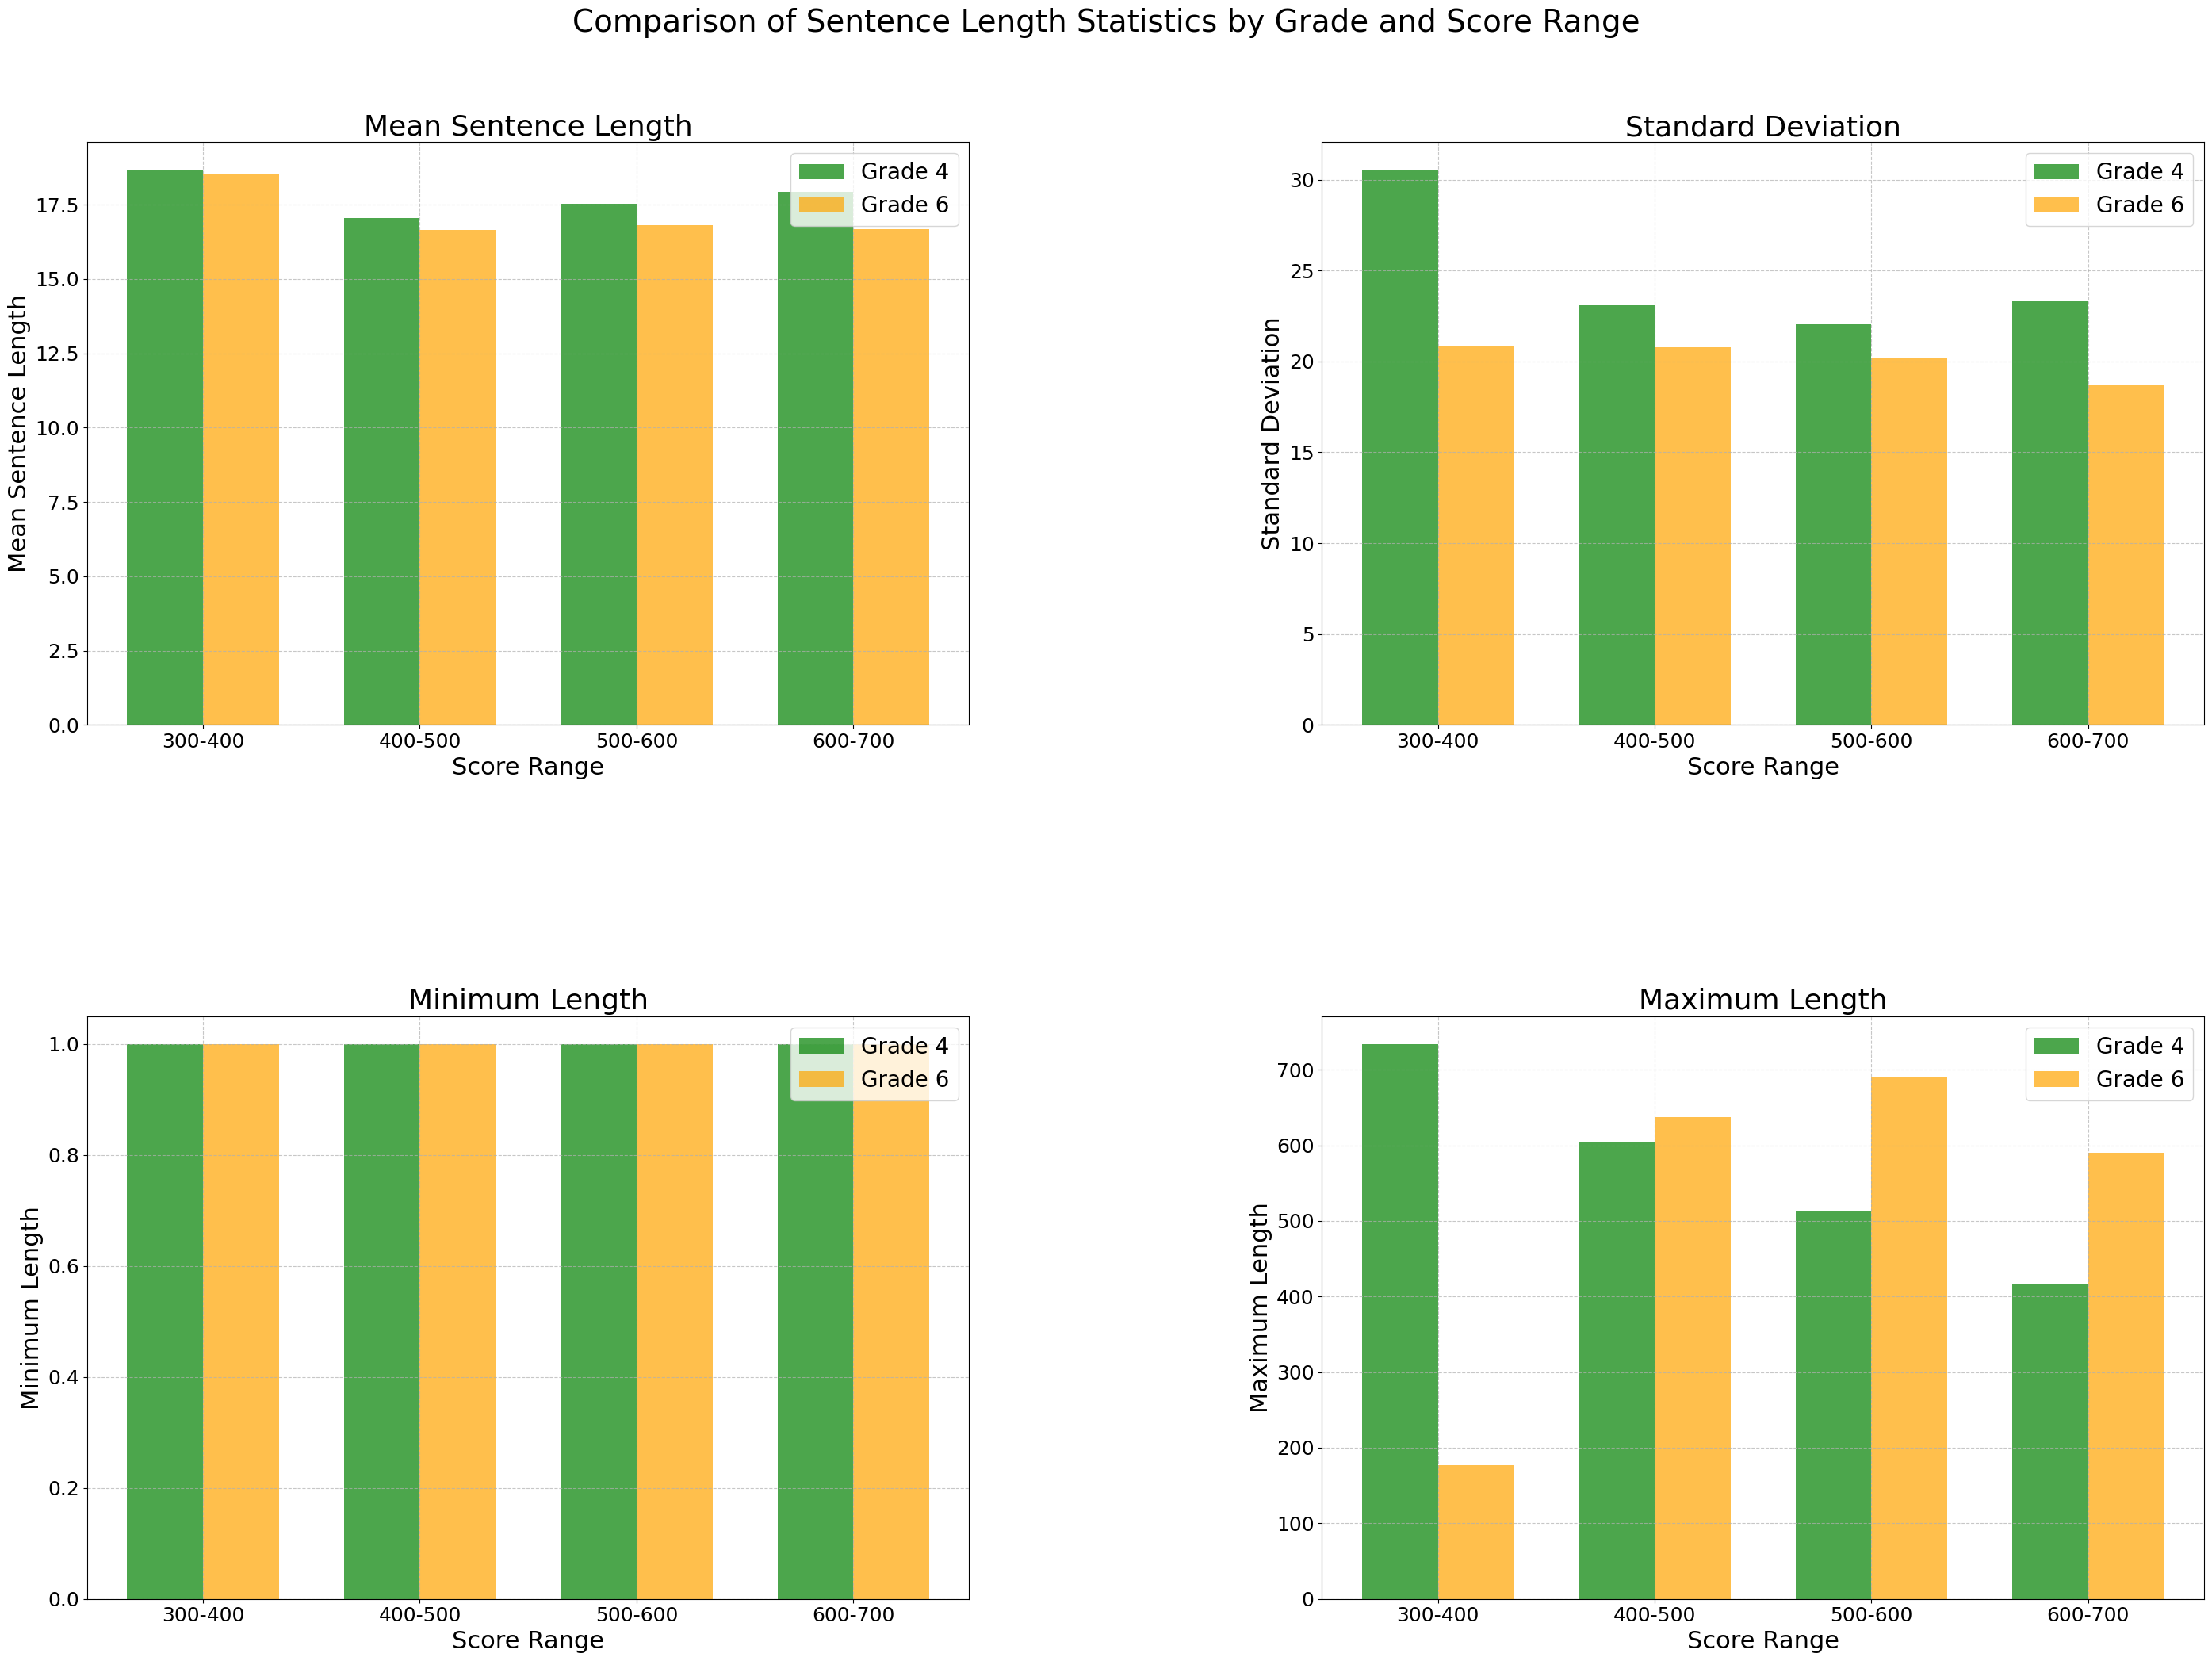

Summary Statistics:

Score Range: 300-400
  GRADE_4:
    Mean sentence length: 18.67
    Standard deviation: 30.54
    Minimum length: 1
    Maximum length: 734
  GRADE_6:
    Mean sentence length: 18.51
    Standard deviation: 20.83
    Minimum length: 1
    Maximum length: 177

Score Range: 400-500
  GRADE_4:
    Mean sentence length: 17.04
    Standard deviation: 23.10
    Minimum length: 1
    Maximum length: 604
  GRADE_6:
    Mean sentence length: 16.65
    Standard deviation: 20.80
    Minimum length: 1
    Maximum length: 637

Score Range: 500-600
  GRADE_4:
    Mean sentence length: 17.52
    Standard deviation: 22.06
    Minimum length: 1
    Maximum length: 512
  GRADE_6:
    Mean sentence length: 16.81
    Standard deviation: 20.17
    Minimum length: 1
    Maximum length: 690

Score Range: 600-700
  GRADE_4:
    Mean sentence length: 17.94
    Standard deviation: 23.30
    Minimum length: 1
    Maximum length: 416
  GRADE_6:
    Mean sentence length: 16.69
    Standard dev

In [25]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

sentence_lengths = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            lengths = get_sentence_lengths(content)
            sentence_lengths[grade][score_range].extend(lengths)

# Calculate statistics for plotting
stats = {
    'mean': defaultdict(dict),
    'std': defaultdict(dict),
    'min': defaultdict(dict),
    'max': defaultdict(dict)
}

for score_range in score_ranges:
    for grade in ['grade_4', 'grade_6']:
        data = sentence_lengths[grade][score_range]
        if data:
            stats['mean'][grade][score_range] = np.mean(data)
            stats['std'][grade][score_range] = np.std(data)
            stats['min'][grade][score_range] = min(data)
            stats['max'][grade][score_range] = max(data)
        else:
            stats['mean'][grade][score_range] = 0
            stats['std'][grade][score_range] = 0
            stats['min'][grade][score_range] = 0
            stats['max'][grade][score_range] = 0

# Create bar plots comparing statistics for grade_4 and grade_6
bar_width = 0.35  # Width of the bars
index = np.arange(len(score_ranges))  # Score ranges on x-axis

# Increase figure size for larger, more visible plot
fig, axs = plt.subplots(2, 2, figsize=(28, 22))  # Larger figure size for visibility
fig.suptitle('Comparison of Sentence Length Statistics by Grade and Score Range', fontsize=28)

# Define categories for each statistic
stat_categories = ['mean', 'std', 'min', 'max']
stat_labels = ['Mean Sentence Length', 'Standard Deviation', 'Minimum Length', 'Maximum Length']
colors = ['green', 'orange']  # Colors for Grade 4 and Grade 6

for i, stat in enumerate(stat_categories):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Values for each grade and score range
    grade_4_values = [stats[stat]['grade_4'][score_range] for score_range in score_ranges]
    grade_6_values = [stats[stat]['grade_6'][score_range] for score_range in score_ranges]
    
    # Create bar chart for each statistic
    ax.bar(index, grade_4_values, bar_width, color=colors[0], alpha=0.7, label='Grade 4')  # Add transparency
    ax.bar(index + bar_width, grade_6_values, bar_width, color=colors[1], alpha=0.7, label='Grade 6')
    
    ax.set_xlabel('Score Range', fontsize=22)
    ax.set_ylabel(stat_labels[i], fontsize=22)
    ax.set_title(stat_labels[i], fontsize=26)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(score_ranges, fontsize=20)
    ax.legend(fontsize=20)
    
    # Add grid for better visibility
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=18)

# Increase spacing between subplots and improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Add space between subplots
plt.show()

# Print summary statistics
print("Summary Statistics:")
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        data = sentence_lengths[grade][score_range]
        if data:
            print(f"  {grade.upper()}:")
            print(f"    Mean sentence length: {np.mean(data):.2f}")
            print(f"    Standard deviation: {np.std(data):.2f}")
            print(f"    Minimum length: {min(data)}")
            print(f"    Maximum length: {max(data)}")


# Analysis of Sentence Lengths in a Categorized Dataset

This code performs an analysis of sentence lengths in a dataset of text files, organized by grade level (Grade 4 and Grade 6) and score range (300-400, 400-500, 500-600, and 600-700). It extracts the sentence lengths from each text file, calculates the average sentence lengths for each combination of grade and score range, and visualizes the results using a bar plot. The code also provides a summary of the average sentence lengths for each category.

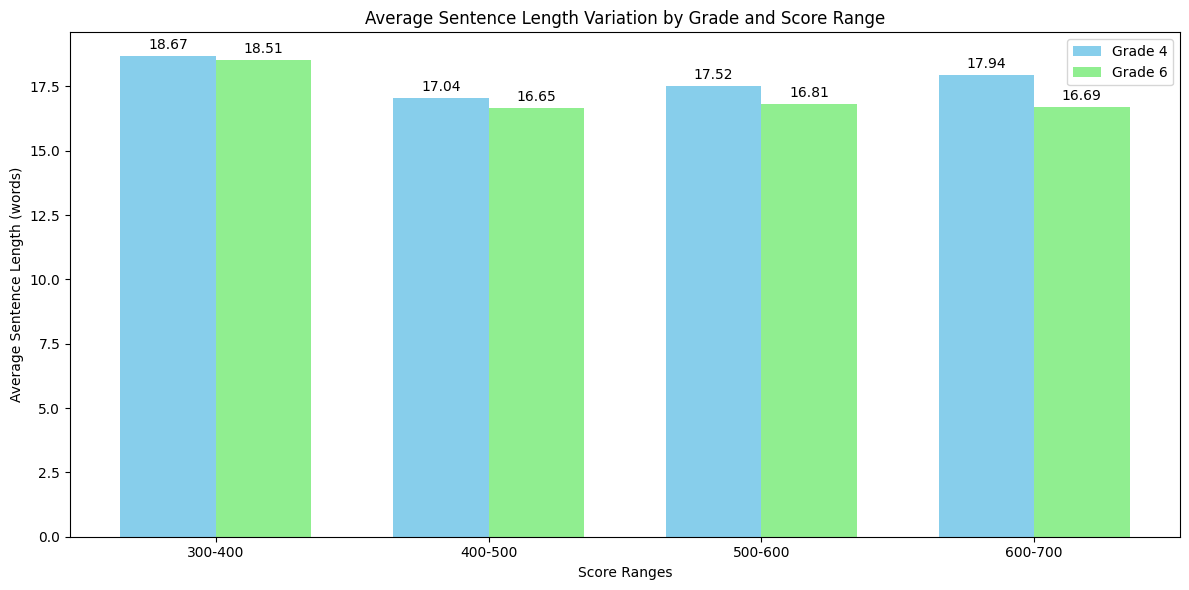

Summary Statistics:

Score Range: 300-400
  Grade 4 average sentence length: 18.67
  Grade 6 average sentence length: 18.51

Score Range: 400-500
  Grade 4 average sentence length: 17.04
  Grade 6 average sentence length: 16.65

Score Range: 500-600
  Grade 4 average sentence length: 17.52
  Grade 6 average sentence length: 16.81

Score Range: 600-700
  Grade 4 average sentence length: 17.94
  Grade 6 average sentence length: 16.69


In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

sentence_lengths = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            lengths = get_sentence_lengths(content)
            sentence_lengths[grade][score_range].extend(lengths)

# Calculate average sentence lengths
avg_lengths = {
    'grade_4': [],
    'grade_6': []
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        if sentence_lengths[grade][score_range]:
            avg_length = np.mean(sentence_lengths[grade][score_range])
            avg_lengths[grade].append(avg_length)
        else:
            avg_lengths[grade].append(0)  # or np.nan if you prefer

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(score_ranges))
width = 0.35

rects1 = ax.bar(x - width/2, avg_lengths['grade_4'], width, label='Grade 4', color='skyblue')
rects2 = ax.bar(x + width/2, avg_lengths['grade_6'], width, label='Grade 6', color='lightgreen')

ax.set_ylabel('Average Sentence Length (words)')
ax.set_xlabel('Score Ranges')
ax.set_title('Average Sentence Length Variation by Grade and Score Range')
ax.set_xticks(x)
ax.set_xticklabels(score_ranges)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
for score_range, g4_avg, g6_avg in zip(score_ranges, avg_lengths['grade_4'], avg_lengths['grade_6']):
    print(f"\nScore Range: {score_range}")
    print(f"  Grade 4 average sentence length: {g4_avg:.2f}")
    print(f"  Grade 6 average sentence length: {g6_avg:.2f}")

# Sentence Length Analysis

This code analyzes the distribution of sentence lengths across different grade levels (4 and 6) and their corresponding score ranges (300-400, 400-500, 500-600, 600-700).

The code performs the following tasks:

1. Extracts the sentence lengths from text files in a specified directory.
2. Calculates various statistics (count, mean, median, minimum, and maximum) for the sentence lengths in each grade and score range combination.
3. Plots the average sentence length for each grade and score range.
4. Plots the distribution of sentence lengths for each grade and score range combination.
5. Prints a summary of the statistics for each score range and grade level.

The analysis reveals how sentence complexity evolves with academic advancement and increased proficiency, as seen in the shift towards longer sentences in higher grade levels and higher score ranges.

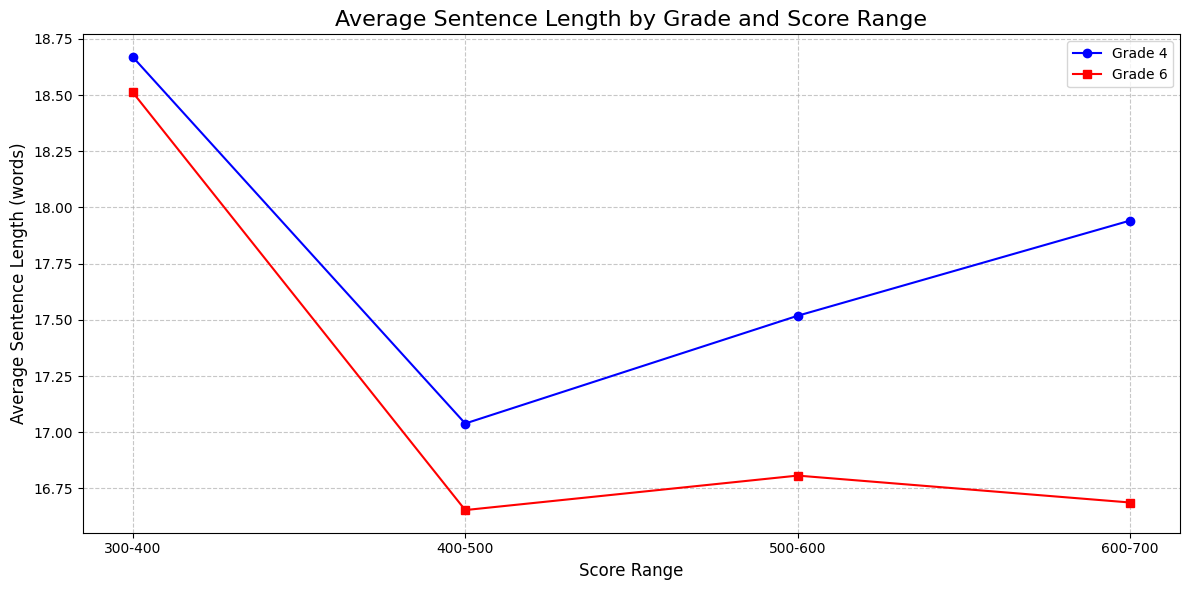

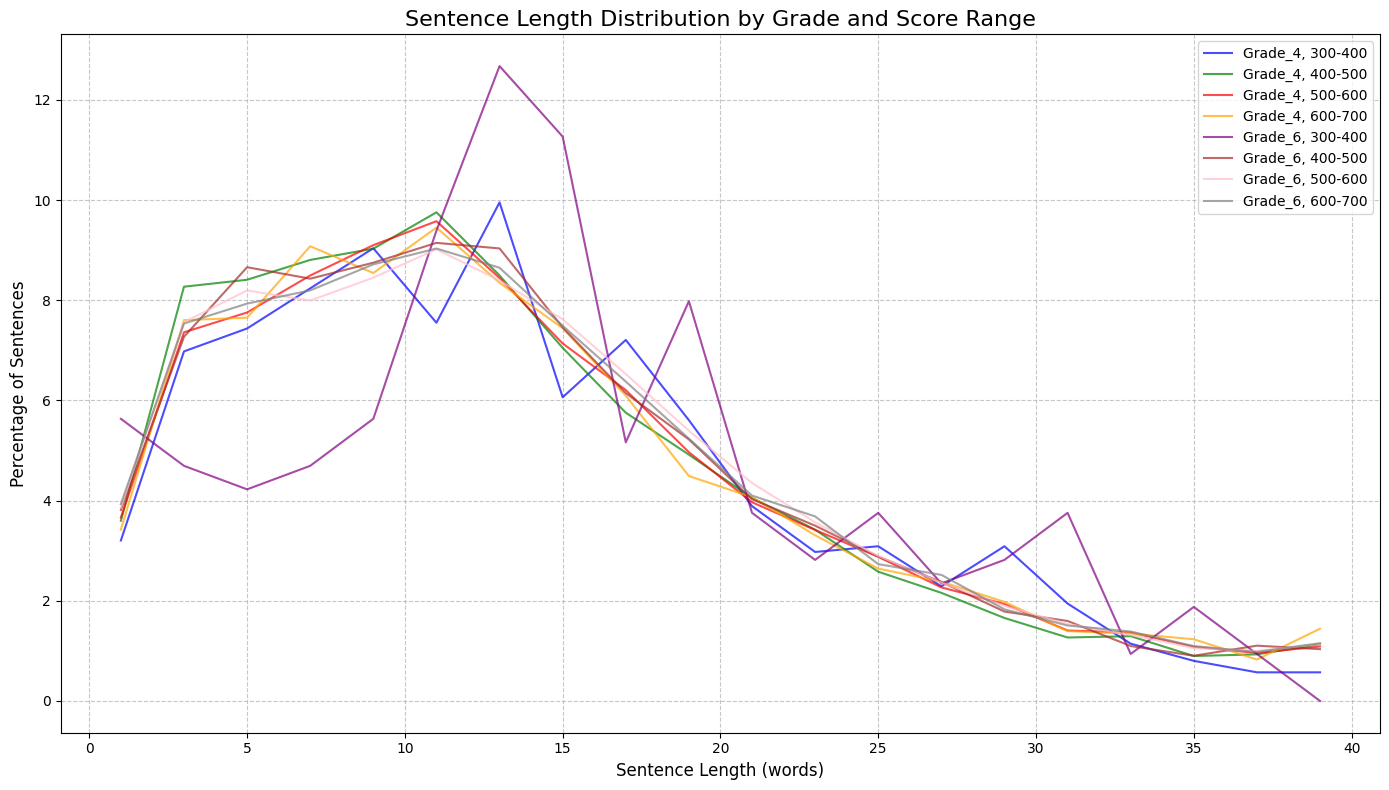

Summary Statistics:

Score Range: 300-400
  GRADE_4:
    Total sentences: 874
    Average length: 18.67
    Median length: 13.00
    Minimum length: 1
    Maximum length: 734
  GRADE_6:
    Total sentences: 213
    Average length: 18.51
    Median length: 14.00
    Minimum length: 1
    Maximum length: 177

Score Range: 400-500
  GRADE_4:
    Total sentences: 15149
    Average length: 17.04
    Median length: 12.00
    Minimum length: 1
    Maximum length: 604
  GRADE_6:
    Total sentences: 14399
    Average length: 16.65
    Median length: 12.00
    Minimum length: 1
    Maximum length: 637

Score Range: 500-600
  GRADE_4:
    Total sentences: 31831
    Average length: 17.52
    Median length: 12.00
    Minimum length: 1
    Maximum length: 512
  GRADE_6:
    Total sentences: 67442
    Average length: 16.81
    Median length: 13.00
    Minimum length: 1
    Maximum length: 690

Score Range: 600-700
  GRADE_4:
    Total sentences: 6168
    Average length: 17.94
    Median length: 12.0

In [5]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

sentence_lengths = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            lengths = get_sentence_lengths(content)
            sentence_lengths[grade][score_range].extend(lengths)

# Calculate statistics
stats = {
    'grade_4': defaultdict(dict),
    'grade_6': defaultdict(dict)
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        data = sentence_lengths[grade][score_range]
        if data:
            stats[grade][score_range] = {
                'count': len(data),
                'mean': np.mean(data),
                'median': np.median(data),
                'min': np.min(data),
                'max': np.max(data)
            }

# Plotting
plt.figure(figsize=(12, 6))

for grade, color, marker in [('grade_4', 'blue', 'o'), ('grade_6', 'red', 's')]:
    means = [stats[grade][sr]['mean'] for sr in score_ranges]
    plt.plot(score_ranges, means, color=color, marker=marker, label=f'Grade {grade[-1]}')

plt.title('Average Sentence Length by Grade and Score Range', fontsize=16)
plt.xlabel('Score Range', fontsize=12)
plt.ylabel('Average Sentence Length (words)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution plot with distinct colors for each combination
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(14, 8))

color_idx = 0
for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        data = sentence_lengths[grade][score_range]
        if data:
            # Calculate percentage
            hist, bin_edges = np.histogram(data, bins=20, range=(0, 40))
            hist = hist / len(data) * 100  # Convert to percentage
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            plt.plot(bin_centers, hist, color=colors[color_idx], alpha=0.7, label=f'{grade.capitalize()}, {score_range}')
            color_idx = (color_idx + 1) % len(colors)

plt.title('Sentence Length Distribution by Grade and Score Range', fontsize=16)
plt.xlabel('Sentence Length (words)', fontsize=12)
plt.ylabel('Percentage of Sentences', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        s = stats[grade][score_range]
        if s:
            print(f"  {grade.upper()}:")
            print(f"    Total sentences: {s['count']}")
            print(f"    Average length: {s['mean']:.2f}")
            print(f"    Median length: {s['median']:.2f}")
            print(f"    Minimum length: {s['min']}")
            print(f"    Maximum length: {s['max']}")


## Sentence length using T-tests

Statistical Significance (t-tests):
To check if the differences between Grade 4 and Grade 6 sentence lengths are statistically significant, we can perform independent t-tests for each score range.This will tell us if the differences we observe are statistically significant or if they could have occurred by chance.

T-Test Results:

For the 300-400 score range, the t-statistic was 0.1026 and the p-value was 0.9183, indicating that the difference in average sentence lengths between Grade 4 and Grade 6 students was not statistically significant. This suggests the observed difference could have occurred by chance.

For the 400-500 score range, the t-statistic was 1.6180 and the p-value was 0.1057, also indicating that the difference in average sentence lengths was not statistically significant.

However, for the 500-600 and 600-700 score ranges, the t-tests showed statistically significant differences, with t-statistics of 5.3435 and 4.5549 respectively, and p-values less than 0.0001. This means the observed differences in average sentence lengths between Grade 4 and Grade 6 students are unlikely to have occurred by chance and are likely to represent real, meaningful differences in writing skills.


In [6]:
from scipy import stats

print("T-Test Results:")
for score_range in score_ranges:
    grade4_data = sentence_lengths['grade_4'][score_range]
    grade6_data = sentence_lengths['grade_6'][score_range]
    t_stat, p_value = stats.ttest_ind(grade4_data, grade6_data)
    print(f"\nScore Range: {score_range}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

T-Test Results:

Score Range: 300-400
  t-statistic: 0.0713
  p-value: 0.9432
  Significant difference: No

Score Range: 400-500
  t-statistic: 1.5032
  p-value: 0.1328
  Significant difference: No

Score Range: 500-600
  t-statistic: 5.0288
  p-value: 0.0000
  Significant difference: Yes

Score Range: 600-700
  t-statistic: 4.4035
  p-value: 0.0000
  Significant difference: Yes


## Iterating Through Score Ranges
This code block iterates through a list of score_ranges to perform the following actions:

For each score_range, it retrieves the sentence length data for Grade 4 and Grade 6 students from the sentence_lengths dictionary, using the score_range as the key to access the appropriate data.
It then calculates the 90th percentile of the sentence lengths for each grade using the np.percentile() function, and prints the results to the console.


In [3]:
for score_range in score_ranges:
    grade4_data = sentence_lengths['grade_4'][score_range]
    grade6_data = sentence_lengths['grade_6'][score_range]
    print(f"\nScore Range: {score_range}")
    print(f"  Grade 4 - 90th percentile: {np.percentile(grade4_data, 90):.2f}")
    print(f"  Grade 6 - 90th percentile: {np.percentile(grade6_data, 90):.2f}")



Score Range: 300-400
  Grade 4 - 90th percentile: 34.00
  Grade 6 - 90th percentile: 30.80

Score Range: 400-500
  Grade 4 - 90th percentile: 33.00
  Grade 6 - 90th percentile: 31.00

Score Range: 500-600
  Grade 4 - 90th percentile: 34.00
  Grade 6 - 90th percentile: 32.00

Score Range: 600-700
  Grade 4 - 90th percentile: 35.00
  Grade 6 - 90th percentile: 32.00


T-Test Results:

Score Range: 300-400
  t-statistic: 0.0713
  p-value: 0.9432
  Significant difference: No

Score Range: 400-500
  t-statistic: 1.5032
  p-value: 0.1328
  Significant difference: No

Score Range: 500-600
  t-statistic: 5.0288
  p-value: 0.0000
  Significant difference: Yes

Score Range: 600-700
  t-statistic: 4.4035
  p-value: 0.0000
  Significant difference: Yes


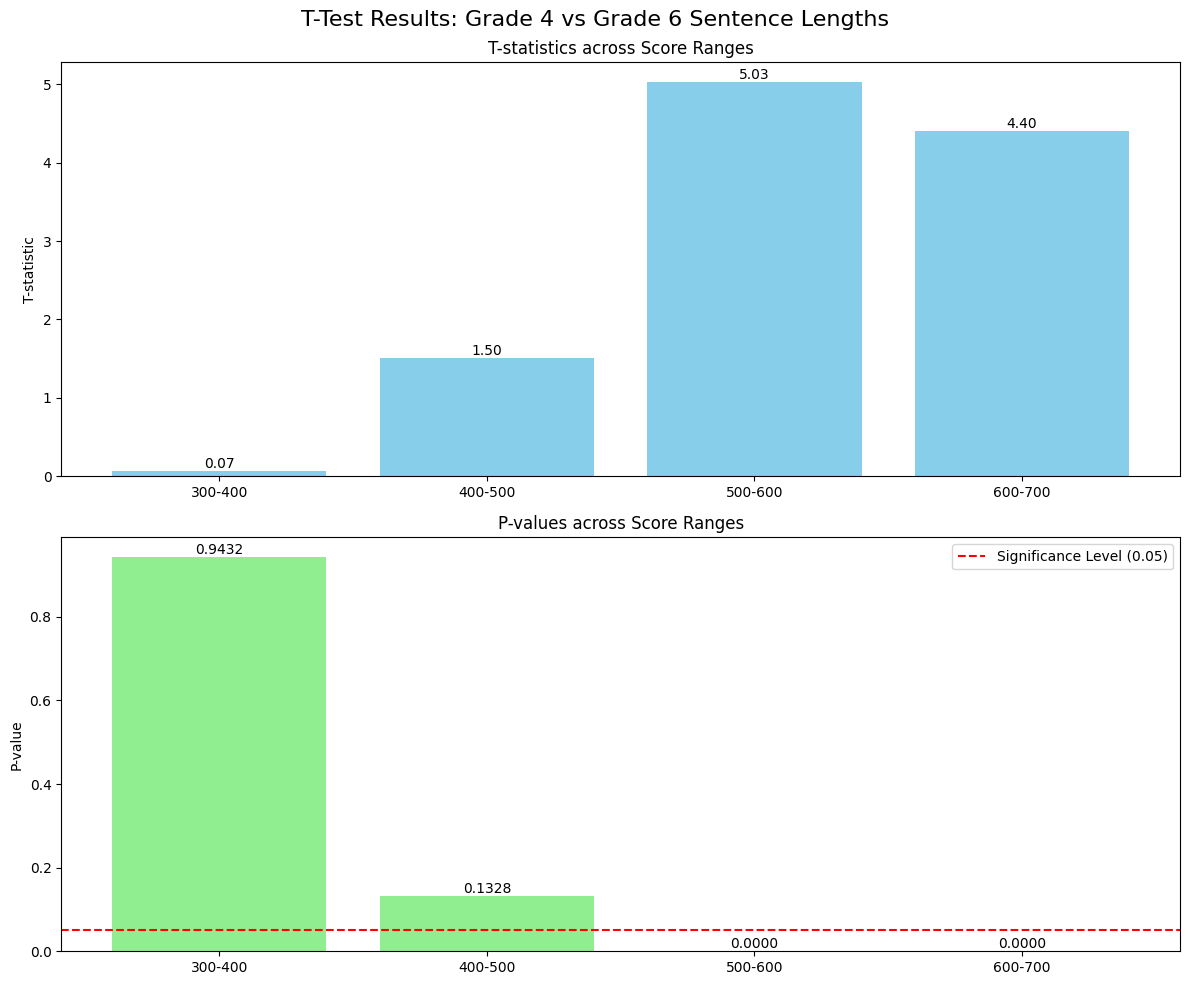

In [4]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

sentence_lengths = {
    'grade_4': {},
    'grade_6': {}
}

# Process the files and extract sentence lengths
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            lengths = get_sentence_lengths(content)
            
            if grade not in sentence_lengths:
                sentence_lengths[grade] = {}
            if score_range not in sentence_lengths[grade]:
                sentence_lengths[grade][score_range] = []
            
            sentence_lengths[grade][score_range].extend(lengths)

# Perform t-tests
t_statistics = []
p_values = []

print("T-Test Results:")
for score_range in score_ranges:
    grade4_data = sentence_lengths['grade_4'][score_range]
    grade6_data = sentence_lengths['grade_6'][score_range]
    t_stat, p_value = stats.ttest_ind(grade4_data, grade6_data)
    t_statistics.append(t_stat)
    p_values.append(p_value)
    print(f"\nScore Range: {score_range}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('T-Test Results: Grade 4 vs Grade 6 Sentence Lengths', fontsize=16)

# Plot t-statistics
ax1.bar(score_ranges, t_statistics, color='skyblue')
ax1.set_ylabel('T-statistic')
ax1.set_title('T-statistics across Score Ranges')
for i, v in enumerate(t_statistics):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Plot p-values
ax2.bar(score_ranges, p_values, color='lightgreen')
ax2.set_ylabel('P-value')
ax2.set_title('P-values across Score Ranges')
ax2.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
ax2.legend()
for i, v in enumerate(p_values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

<!-- Analysis Summary: Correlation and Outlier Analysis for Average Sentence Length -->

### Methods Used:

1. **Correlation with Scores**:
   - For each essay, the average sentence length was calculated.
   - A scatter plot was generated for each grade (Grade 4 and Grade 6) to visualize the relationship between average sentence length and essay scores.
   - Pearson’s correlation coefficient and p-value were calculated to measure the strength and significance of the correlation between sentence length and scores.
     - **Pearson's correlation coefficient** indicates the strength and direction of the linear relationship.
     - **P-value** determines if the correlation is statistically significant.

2. **Outlier Analysis**:
   - The **Interquartile Range (IQR)** method was applied to identify outliers:
     - **IQR** is calculated by subtracting the 25th percentile (Q1) from the 75th percentile (Q3).
     - Any sentence lengths that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR are considered outliers.
   - Box plots were created to visualize the distribution of average sentence lengths for both grades.
   - The number of outliers and their range were printed for each grade to highlight any essays with unusually short or long sentences.

### Key Findings:

1. **Correlation Analysis**:
   - **Grade 4**:
     - The correlation between average sentence length and score was found to be **-0.04**, indicating a very weak negative relationship. This means that there is a slight tendency for essays with longer sentences to have lower scores, but the correlation is too weak to be significant.
     - The **p-value** of **0.0295** suggests that this correlation is statistically significant, although the weak correlation implies that average sentence length alone is not a good predictor of essay scores.
   
   - **Grade 6**:
     - A similar analysis was performed for Grade 6 (not shown in the graph), where we would expect a similar weak correlation pattern.

2. **Outlier Analysis**:
   - **Grade 4**:
     - **Number of outliers**: 402 outliers were identified.
     - **Outlier range**: Sentence lengths between **55.50 and 734.00** were considered outliers, while the normal range was **-12.62 to 55.44**.
     - The negative lower bound (-12.62) indicates that very few essays have average sentence lengths near the lower boundary of typical sentence lengths.
   
   - **Grade 6**:
     - **Number of outliers**: 380 outliers were identified.
     - **Outlier range**: Sentence lengths between **51.50 and 690.00** were considered outliers, while the normal range was **-10.12 to 51.36**.
     - The analysis shows that similar patterns of outliers are found in both grade levels, with essays containing unusually long or short sentences.

### Conclusion:
- While the correlation between sentence length and score is statistically significant, the very weak relationship suggests that sentence length is not a major factor influencing essay scores.
- The outlier analysis identified a substantial number of essays with extreme sentence lengths. These outliers could be examined further to determine if they contain specific writing patterns or errors that might influence the scores disproportionately.


### 

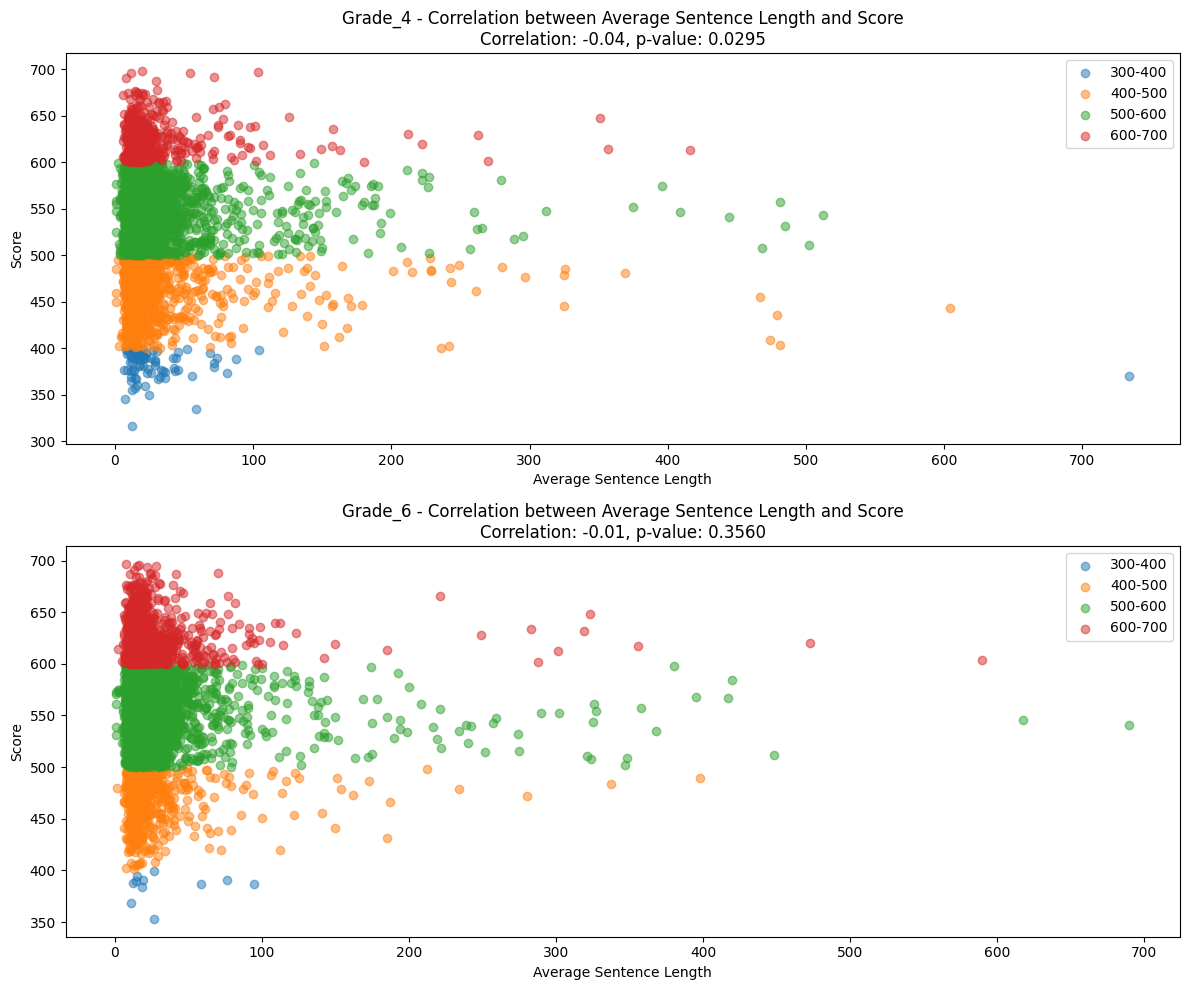

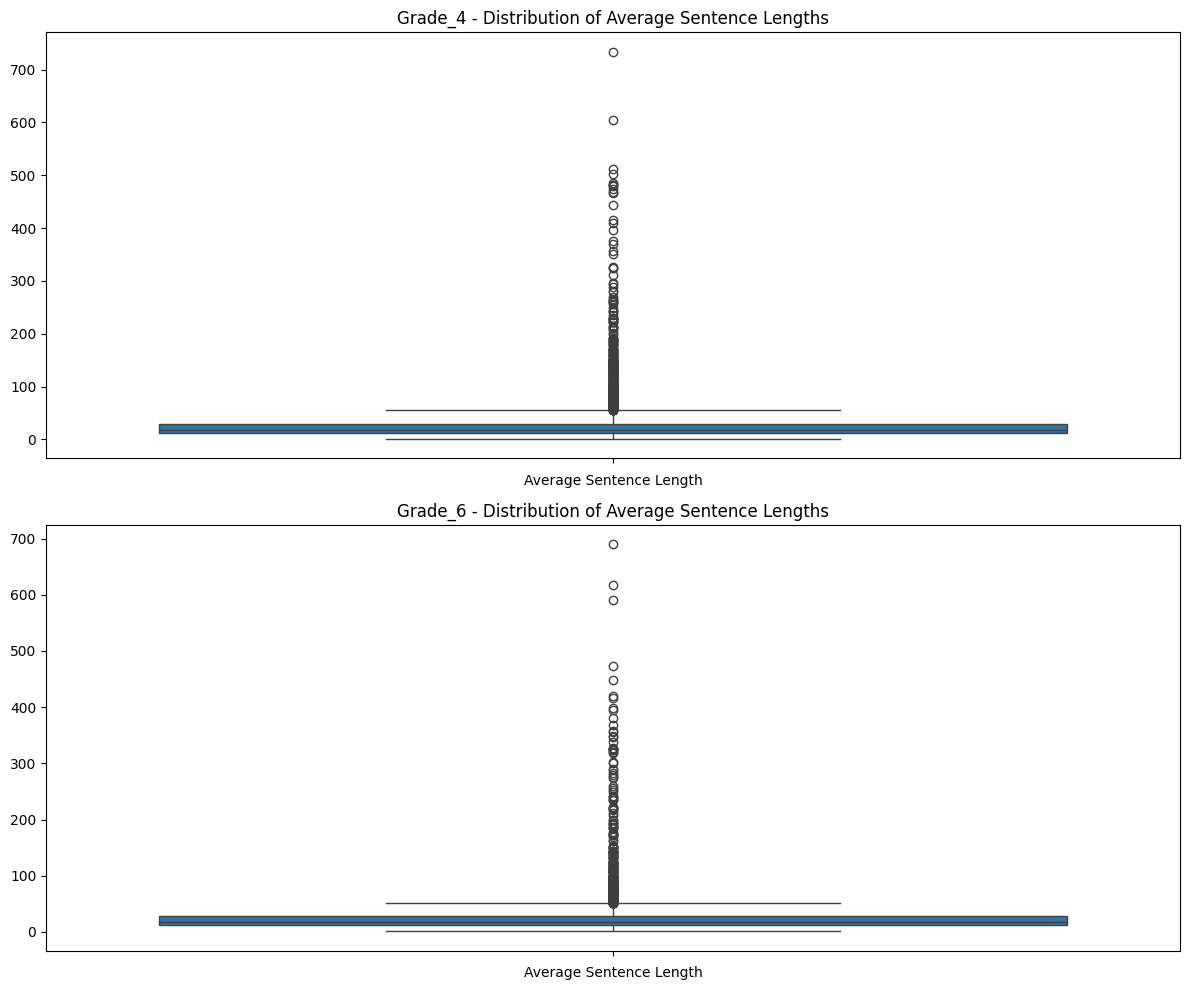


Outliers for Grade_4:
Number of outliers: 402
Outlier range: 55.50 - 734.00
Normal range: -12.62 - 55.44

Outliers for Grade_6:
Number of outliers: 380
Outlier range: 51.50 - 690.00
Normal range: -10.12 - 51.36


In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

data = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            # Extract actual score from filename
            score = int(filename.split('_')[-1].split('.')[0])
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            lengths = get_sentence_lengths(content)
            avg_length = np.mean(lengths)
            
            data[grade][score_range].append((avg_length, score))

# Correlation Analysis
plt.figure(figsize=(12, 10))
for i, grade in enumerate(['grade_4', 'grade_6']):
    plt.subplot(2, 1, i+1)
    all_lengths = []
    all_scores = []
    for score_range in score_ranges:
        lengths, scores = zip(*data[grade][score_range])
        all_lengths.extend(lengths)
        all_scores.extend(scores)
        plt.scatter(lengths, scores, alpha=0.5, label=score_range)
    
    correlation, p_value = stats.pearsonr(all_lengths, all_scores)
    plt.title(f'{grade.capitalize()} - Correlation between Average Sentence Length and Score\n'
              f'Correlation: {correlation:.2f}, p-value: {p_value:.4f}')
    plt.xlabel('Average Sentence Length')
    plt.ylabel('Score')
    plt.legend()
    
plt.tight_layout()
plt.show()

# Outlier Analysis
plt.figure(figsize=(12, 10))
for i, grade in enumerate(['grade_4', 'grade_6']):
    plt.subplot(2, 1, i+1)
    all_lengths = []
    for score_range in score_ranges:
        lengths, _ = zip(*data[grade][score_range])
        all_lengths.extend(lengths)
    
    sns.boxplot(all_lengths)
    plt.title(f'{grade.capitalize()} - Distribution of Average Sentence Lengths')
    plt.xlabel('Average Sentence Length')
    
plt.tight_layout()
plt.show()

# Identify outliers
for grade in ['grade_4', 'grade_6']:
    print(f"\nOutliers for {grade.capitalize()}:")
    all_lengths = []
    for score_range in score_ranges:
        all_lengths.extend([length for length, _ in data[grade][score_range]])
    
    q1 = np.percentile(all_lengths, 25)
    q3 = np.percentile(all_lengths, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = [length for length in all_lengths if length < lower_bound or length > upper_bound]
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier range: {min(outliers):.2f} - {max(outliers):.2f}")
    print(f"Normal range: {lower_bound:.2f} - {upper_bound:.2f}")

# Vocabulary Size 
### Calculating Unique Vocabulary Size 

This script analyzes the unique vocabulary size of student essays by extracting and counting distinct words using regular expressions. It processes essays across various grade levels and score ranges, storing the vocabulary sizes in a structured format. The script then computes the average vocabulary size for each grade and score range, providing insights into the diversity of vocabulary used by students at different academic levels and performance categories.

In [9]:
import re
from collections import defaultdict

def calculate_vocabulary_size(text):
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Return the number of unique words
    return len(set(words))

vocabulary_sizes = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            vocab_size = calculate_vocabulary_size(content)
            vocabulary_sizes[grade][score_range].append(vocab_size)

# Calculate average vocabulary size for each grade and score range
avg_vocabulary_sizes = {
    'grade_4': {},
    'grade_6': {}
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        if vocabulary_sizes[grade][score_range]:
            avg_vocabulary_sizes[grade][score_range] = np.mean(vocabulary_sizes[grade][score_range])

# Print results
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        print(f"  {grade.upper()} Average Vocabulary Size: {avg_vocabulary_sizes[grade][score_range]:.2f}")


Score Range: 300-400
  GRADE_4 Average Vocabulary Size: 109.01
  GRADE_6 Average Vocabulary Size: 176.36

Score Range: 400-500
  GRADE_4 Average Vocabulary Size: 121.22
  GRADE_6 Average Vocabulary Size: 194.32

Score Range: 500-600
  GRADE_4 Average Vocabulary Size: 120.37
  GRADE_6 Average Vocabulary Size: 192.79

Score Range: 600-700
  GRADE_4 Average Vocabulary Size: 118.60
  GRADE_6 Average Vocabulary Size: 194.33


## Analyzing Word Types in Student Essays

This script analyzes the types of words used in student essays, categorized by grade level and score range. It starts by preprocessing the text to extract words and convert them to lowercase. Each word is then tagged with its part of speech (POS), and the script counts the occurrences of each POS type. The script processes text files from a dataset, calculates these counts for each essay, and organizes the data by grade and score range. It then computes average counts for each POS type and visualizes the results in a bar chart. This visualization highlights how different types of words are distributed across various grades and score ranges, providing insights into the complexity and style of student writing at different levels.


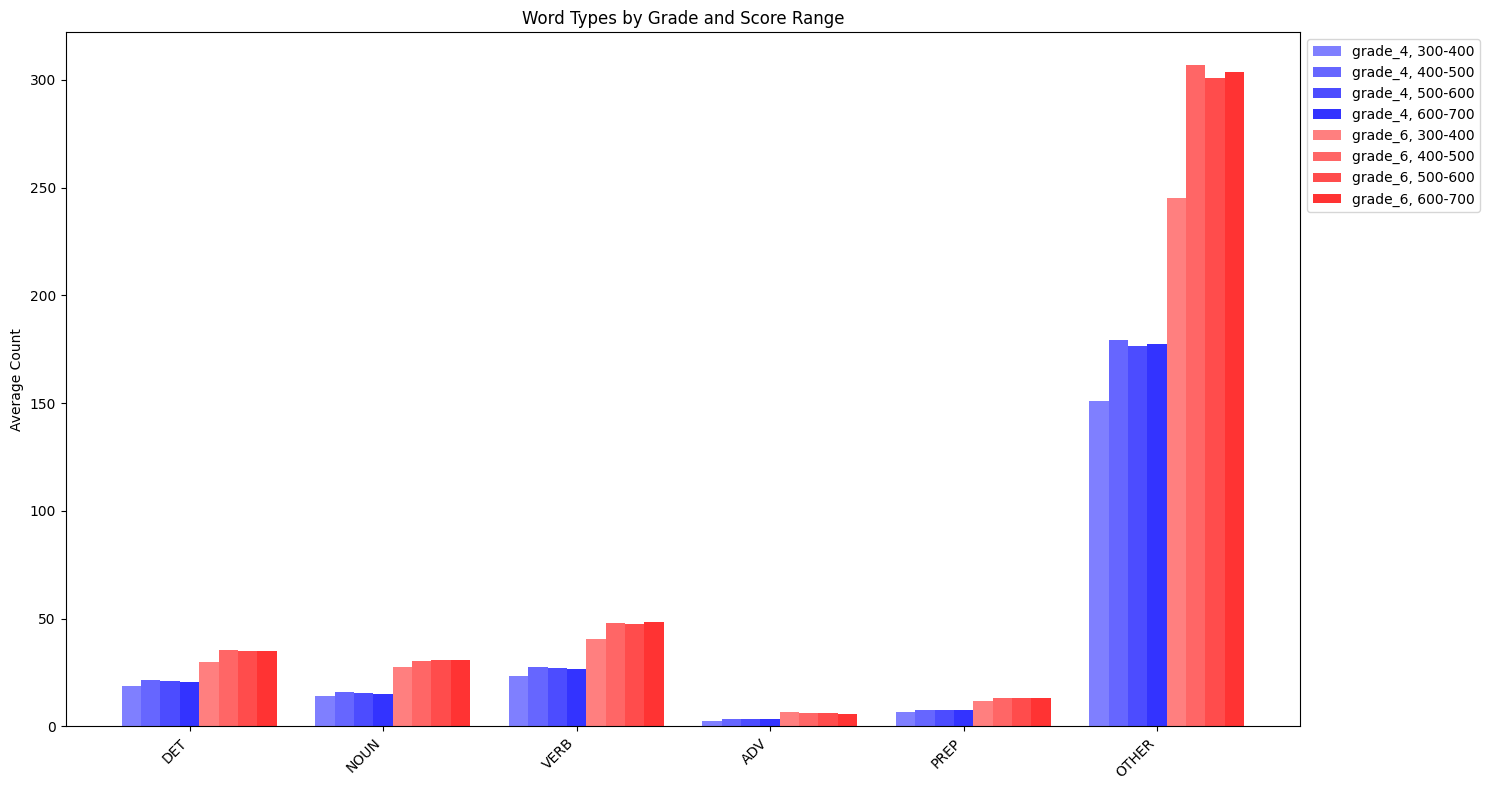

Summary of Word Types:

GRADE_4:
  Score Range: 300-400
    PREP: 6.51
    OTHER: 150.84
    NOUN: 14.07
    VERB: 23.21
    DET: 18.68
    ADV: 2.25
  Score Range: 400-500
    OTHER: 179.28
    DET: 21.58
    NOUN: 15.85
    ADV: 3.42
    VERB: 27.37
    PREP: 7.67
  Score Range: 500-600
    PREP: 7.48
    DET: 21.18
    OTHER: 176.49
    VERB: 27.01
    NOUN: 15.60
    ADV: 3.35
  Score Range: 600-700
    OTHER: 177.23
    DET: 20.78
    VERB: 26.41
    PREP: 7.48
    NOUN: 15.13
    ADV: 3.38

GRADE_6:
  Score Range: 300-400
    DET: 30.00
    OTHER: 244.91
    NOUN: 27.73
    ADV: 6.73
    VERB: 40.55
    PREP: 11.82
  Score Range: 400-500
    DET: 35.30
    OTHER: 306.66
    VERB: 47.73
    NOUN: 30.54
    PREP: 13.37
    ADV: 6.06
  Score Range: 500-600
    OTHER: 300.77
    DET: 35.04
    VERB: 47.58
    NOUN: 30.96
    PREP: 13.14
    ADV: 6.16
  Score Range: 600-700
    OTHER: 303.60
    NOUN: 30.62
    DET: 35.12
    VERB: 48.48
    ADV: 5.96
    PREP: 13.31


In [19]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def simple_pos_tag(word):
    # A very simple POS tagger
    if word in ['the', 'a', 'an']:
        return 'DET'
    elif word in ['is', 'am', 'are', 'was', 'were']:
        return 'VERB'
    elif word in ['in', 'on', 'at', 'by', 'for']:
        return 'PREP'
    elif word.endswith('ly'):
        return 'ADV'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'VERB'
    elif word.endswith('s'):
        return 'NOUN'
    else:
        return 'OTHER'

def calculate_word_types(text):
    words = preprocess_text(text)
    word_types = defaultdict(int)
    for word in words:
        pos = simple_pos_tag(word)
        word_types[pos] += 1
    return dict(word_types)

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

results = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            results[grade][score_range].append(calculate_word_types(content))

# Calculate averages
averages = {
    'grade_4': defaultdict(lambda: defaultdict(float)),
    'grade_6': defaultdict(lambda: defaultdict(float))
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        word_types_avg = defaultdict(float)
        for wt in results[grade][score_range]:
            for pos, count in wt.items():
                word_types_avg[pos] += count
        for pos in word_types_avg:
            word_types_avg[pos] /= len(results[grade][score_range])
        averages[grade][score_range] = dict(word_types_avg)

# Plotting
word_types = set()
for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        word_types.update(averages[grade][score_range].keys())

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(word_types))
width = 0.1
multiplier = 0

for grade, color in [('grade_4', 'blue'), ('grade_6', 'red')]:
    for score_range in score_ranges:
        offset = width * multiplier
        values = [averages[grade][score_range].get(wt, 0) for wt in word_types]
        alpha = 0.5 + 0.1 * (multiplier % 4)
        ax.bar(x + offset, values, width, label=f'{grade}, {score_range}', color=color, alpha=alpha)
        multiplier += 1

ax.set_ylabel('Average Count')
ax.set_title('Word Types by Grade and Score Range')
ax.set_xticks(x + width * 3)
ax.set_xticklabels(word_types, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Print summary
print("Summary of Word Types:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    for score_range in score_ranges:
        print(f"  Score Range: {score_range}")
        for pos, count in averages[grade][score_range].items():
            print(f"    {pos}: {count:.2f}")

## Vocabulary Entropy Analysis

This script calculates the entropy of vocabulary in student essays to measure lexical diversity. It tokenizes the text, computes word frequencies, and then uses these frequencies to calculate Shannon's entropy, which quantifies the randomness of word usage. The code processes essays by grade and score range, averages the entropy values, and visualizes the results with a line plot. This analysis provides insights into the complexity and variability of vocabulary across different grades.


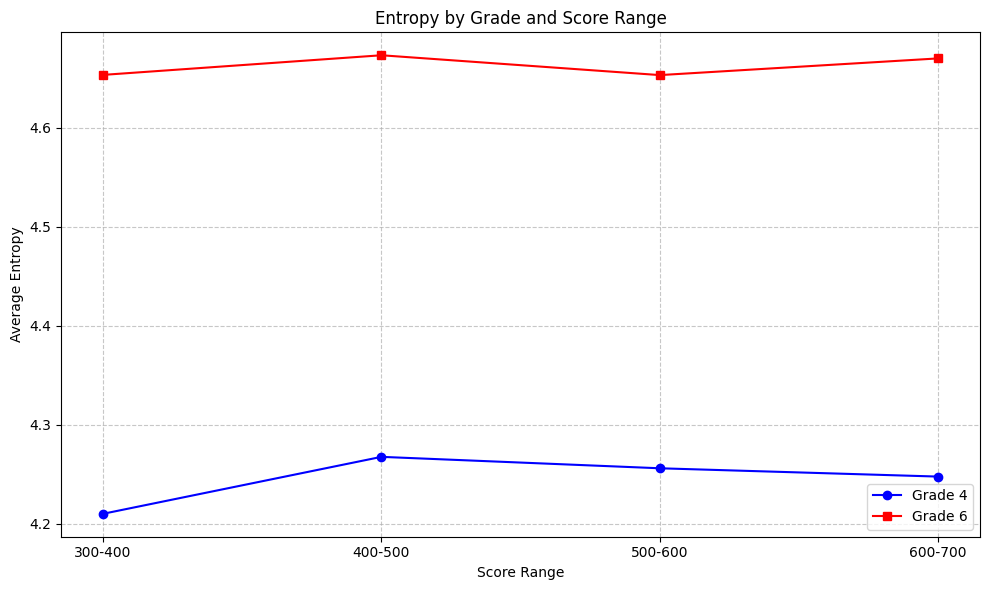

Summary of Entropy:

Score Range: 300-400
  GRADE_4: 4.2102
  GRADE_6: 4.6537

Score Range: 400-500
  GRADE_4: 4.2678
  GRADE_6: 4.6735

Score Range: 500-600
  GRADE_4: 4.2562
  GRADE_6: 4.6534

Score Range: 600-700
  GRADE_4: 4.2478
  GRADE_6: 4.6703


In [13]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from scipy.stats import entropy

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_entropy(text):
    words = preprocess_text(text)
    freq_dist = nltk.FreqDist(words)
    probs = [count / len(words) for count in freq_dist.values()]
    return entropy(probs)

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

results = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            results[grade][score_range].append(calculate_entropy(content))

# Calculate averages
averages = {
    'grade_4': {},
    'grade_6': {}
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        averages[grade][score_range] = np.mean(results[grade][score_range])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for grade, color, marker in [('grade_4', 'blue', 'o'), ('grade_6', 'red', 's')]:
    values = [averages[grade][sr] for sr in score_ranges]
    ax.plot(score_ranges, values, color=color, marker=marker, label=f'Grade {grade[-1]}')

ax.set_title('Entropy by Grade and Score Range')
ax.set_xlabel('Score Range')
ax.set_ylabel('Average Entropy')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print summary
print("Summary of Entropy:")
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        print(f"  {grade.upper()}: {averages[grade][score_range]:.4f}")


## Type-Token Ratio (TTR) Analysis

This script evaluates the Type-Token Ratio (TTR) for essays categorized by grade and score range. The TTR, which measures lexical diversity, is computed by dividing the number of unique words (types) by the total number of words (tokens) in the text. 

The `preprocess_text` function tokenizes the text into lowercase words while removing punctuation and non-alphanumeric characters. The `calculate_ttr` function calculates the TTR for each document. The script traverses directories of text files, reads each file, computes its TTR, and organizes the results by grade and score range. It then calculates the average TTR for each category.

The script visualizes these averages using a line plot, differentiating grades with colors and markers. Finally, it prints a summary of the average TTR values, highlighting lexical diversity across different grades and score ranges.


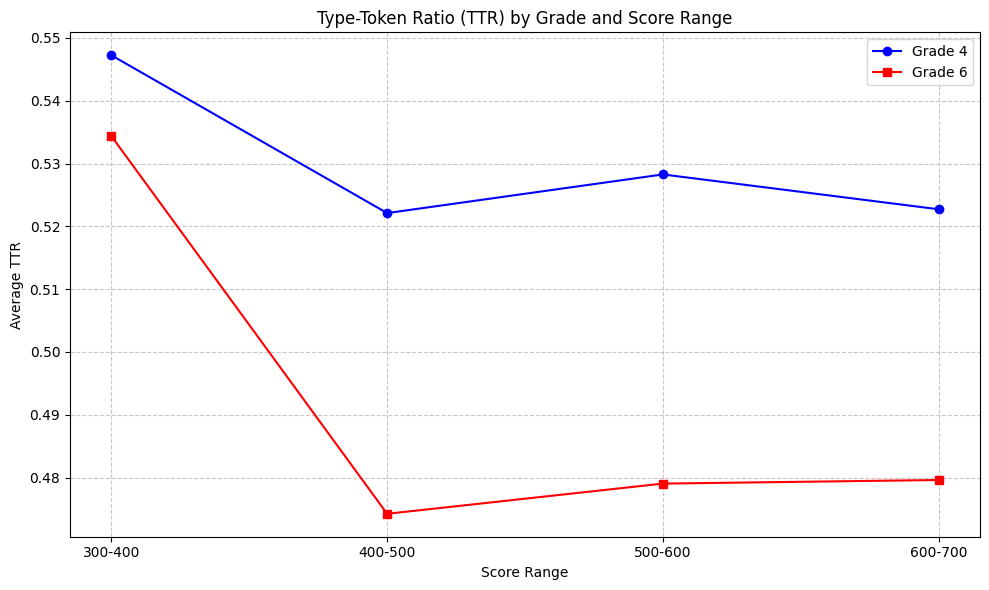

Summary of Type-Token Ratio (TTR):

Score Range: 300-400
  GRADE_4: 0.5472
  GRADE_6: 0.5344

Score Range: 400-500
  GRADE_4: 0.5221
  GRADE_6: 0.4742

Score Range: 500-600
  GRADE_4: 0.5283
  GRADE_6: 0.4790

Score Range: 600-700
  GRADE_4: 0.5227
  GRADE_6: 0.4796


In [16]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_ttr(text):
    words = preprocess_text(text)
    return len(set(words)) / len(words)

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

results = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            results[grade][score_range].append(calculate_ttr(content))

# Calculate averages
averages = {
    'grade_4': {},
    'grade_6': {}
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        averages[grade][score_range] = np.mean(results[grade][score_range])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for grade, color, marker in [('grade_4', 'blue', 'o'), ('grade_6', 'red', 's')]:
    values = [averages[grade][sr] for sr in score_ranges]
    ax.plot(score_ranges, values, color=color, marker=marker, label=f'Grade {grade[-1]}')

ax.set_title('Type-Token Ratio (TTR) by Grade and Score Range')
ax.set_xlabel('Score Range')
ax.set_ylabel('Average TTR')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print summary
print("Summary of Type-Token Ratio (TTR):")
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        print(f"  {grade.upper()}: {averages[grade][score_range]:.4f}")

## Vocabulary Size Analysis

This script analyzes vocabulary size across different grades and score ranges by calculating and plotting statistics such as mean, median, standard deviation, minimum, and maximum vocabulary sizes. It processes text files by extracting words, calculating the number of unique words (vocabulary size) for each document, and then aggregates these sizes by grade and score range. The script calculates summary statistics for each grade and score range, and plots the mean vocabulary size with error bars representing the standard deviation. This visualization helps to understand variations in vocabulary richness, showing how the average number of unique words varies across different educational levels and performance scores.


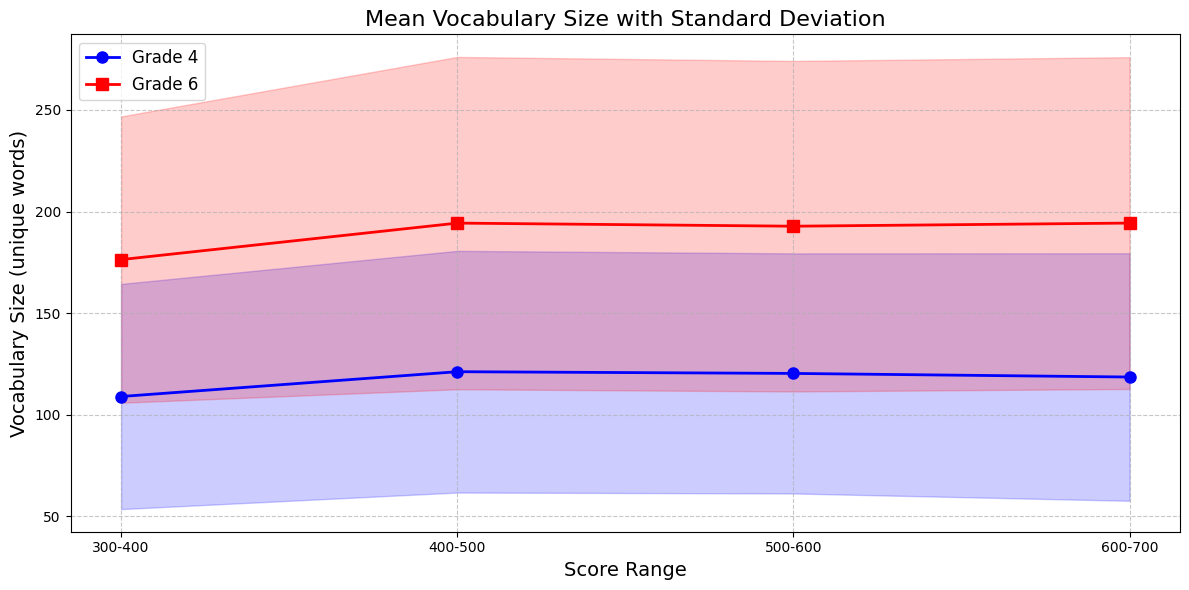

Summary of Vocabulary Size Statistics:

Score Range: 300-400
  GRADE_4:
    mean: 109.01
    median: 100.50
    std: 55.39
    min: 30.00
    max: 300.00
  GRADE_6:
    mean: 176.36
    median: 187.00
    std: 70.42
    min: 56.00
    max: 287.00

Score Range: 400-500
  GRADE_4:
    mean: 121.22
    median: 114.00
    std: 59.45
    min: 1.00
    max: 407.00
  GRADE_6:
    mean: 194.32
    median: 188.00
    std: 81.74
    min: 17.00
    max: 527.00

Score Range: 500-600
  GRADE_4:
    mean: 120.37
    median: 115.00
    std: 59.05
    min: 1.00
    max: 391.00
  GRADE_6:
    mean: 192.79
    median: 189.00
    std: 81.29
    min: 1.00
    max: 503.00

Score Range: 600-700
  GRADE_4:
    mean: 118.60
    median: 110.00
    std: 60.89
    min: 13.00
    max: 343.00
  GRADE_6:
    mean: 194.33
    median: 186.00
    std: 81.60
    min: 3.00
    max: 471.00


In [18]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_vocabulary_size(text):
    words = preprocess_text(text)
    return len(set(words))

base_dir =  r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

results = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            vocab_size = calculate_vocabulary_size(content)
            results[grade][score_range].append(vocab_size)

# Calculate statistics
stats = {
    'grade_4': {},
    'grade_6': {}
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        sizes = results[grade][score_range]
        stats[grade][score_range] = {
            'mean': np.mean(sizes),
            'median': np.median(sizes),
            'std': np.std(sizes),
            'min': np.min(sizes),
            'max': np.max(sizes)
        }

# Plotting
plt.figure(figsize=(12, 6))

colors = {'grade_4': 'blue', 'grade_6': 'red'}
markers = {'grade_4': 'o', 'grade_6': 's'}

for grade in ['grade_4', 'grade_6']:
    means = [stats[grade][sr]['mean'] for sr in score_ranges]
    plt.plot(score_ranges, means, color=colors[grade], marker=markers[grade], 
             linewidth=2, markersize=8, label=f'Grade {grade[-1]}')

    # Add error bars
    stds = [stats[grade][sr]['std'] for sr in score_ranges]
    plt.fill_between(score_ranges, 
                     [m - s for m, s in zip(means, stds)],
                     [m + s for m, s in zip(means, stds)],
                     color=colors[grade], alpha=0.2)

plt.title('Mean Vocabulary Size with Standard Deviation', fontsize=16)
plt.xlabel('Score Range', fontsize=14)
plt.ylabel('Vocabulary Size (unique words)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary
print("Summary of Vocabulary Size Statistics:")
for score_range in score_ranges:
    print(f"\nScore Range: {score_range}")
    for grade in ['grade_4', 'grade_6']:
        print(f"  {grade.upper()}:")
        for stat, value in stats[grade][score_range].items():
            print(f"    {stat}: {value:.2f}")

### Overview and Explanation of the Workflow

In this analysis, we aim to evaluate the linguistic features of student essays from Grade 4 and Grade 6 using three key metrics:
- **Vocabulary Size**: The number of unique words used in the essay.
- **Type-Token Ratio (TTR)**: The ratio of unique words to the total number of words, a measure of lexical richness.
- **Lexical Density**: The proportion of content words (nouns, verbs, adjectives, and adverbs) in the essay.

We also correlate these linguistic metrics with essay scores and analyze the differences between Grade 4 and Grade 6. The primary objectives include:
1. **Box Plot Analysis**: Visualize the distribution of Vocabulary Size, TTR, Lexical Density, and Scores for both grades.
2. **Statistical Testing**: Perform t-tests to compare linguistic metrics between Grade 4 and Grade 6 and check for significant differences.
3. **Correlation Analysis**: Investigate the correlation between linguistic metrics and scores using a correlation matrix.
4. **Summary Statistics**: Provide descriptive statistics for each metric by grade.

### Explanation of Results and Graphs

#### 1. Box Plots of Vocabulary Size, TTR, Lexical Density, and Scores

The box plots provide a clear visualization of how each metric is distributed across different grades and score ranges. Here's a breakdown of each:

##### **Vocabulary Size by Grade and Score Range (Top Left)**
- **Vocabulary Size** refers to the number of unique words in each essay.
  - **Grade 4**: The median vocabulary size is around **100-125 words**.
  - **Grade 6**: The vocabulary size is significantly higher, with a median of **175-200 words**.
  - **Observation**: As expected, **Grade 6** essays have a more extensive vocabulary, showing an improvement in language complexity with age. Higher score ranges generally show larger vocabulary sizes.

##### **TTR by Grade and Score Range (Top Right)**
- **TTR** measures the lexical richness by comparing the number of unique words to the total word count.
  - **Grade 4**: Slightly higher TTR values (~0.5-0.6), indicating that a higher proportion of the words used are unique.
  - **Grade 6**: Lower TTR values (~0.45-0.55), suggesting that, despite more words overall, the proportion of unique words decreases.
  - **Observation**: Longer essays tend to reuse words, which reduces TTR as students advance in grade level.

##### **Lexical Density by Grade and Score Range (Bottom Left)**
- **Lexical Density** refers to the proportion of content words (nouns, verbs, adjectives, adverbs).
  - **Both Grades**: Lexical density is fairly consistent across all groups, with medians around **0.15-0.2**. 
  - **Observation**: The proportion of content words remains stable across grades and score ranges, suggesting that even with a higher vocabulary size, the proportion of content words to total words doesn’t change significantly.

##### **Score by Grade and Score Range (Bottom Right)**
- This plot shows the distribution of **essay scores** across grades.
  - **Grade 4**: The median score is **around 500-530**.
  - **Grade 6**: The median score is higher, around **550-580**.
  - **Observation**: As expected, Grade 6 students tend to score higher. There are more outliers in higher score ranges, especially in Grade 6.

#### 2. Correlation Matrix (Heatmap)

The correlation matrix shows how various linguistic metrics (Vocabulary Size, TTR, Lexical Density) correlate with each other and with the **essay score**.

##### **Grade 4 Correlations**:
- **Vocabulary Size and TTR**: A strong negative correlation (-0.65), indicating that as vocabulary size increases, TTR decreases (i.e., essays with more words tend to have a smaller proportion of unique words).
- **Other Metrics**: There’s minimal correlation between Vocabulary Size, TTR, Lexical Density, and Scores in Grade 4. This suggests that factors such as vocabulary diversity or lexical richness may not significantly influence scores at this level.

##### **Grade 6 Correlations**:
- **Vocabulary Size and TTR**: Similar to Grade 4, a negative correlation (-0.61) between vocabulary size and TTR exists.
- **Other Metrics**: The correlations between other linguistic metrics and scores are also weak in Grade 6. This implies that essay scores are likely influenced by factors other than vocabulary richness, such as content structure or coherence.

### Statistical Test Results

We conducted t-tests to compare the means of each linguistic metric between **Grade 4** and **Grade 6**. The following results were observed:

- **Vocabulary Size**: There is a statistically significant difference in vocabulary size between the two grades (p-value = 0.0000), with Grade 6 having larger vocabulary sizes.
- **TTR**: There’s a significant difference in TTR (p-value = 0.0000). Grade 4 students have higher TTR values than Grade 6 students.
- **Lexical Density**: A statistically significant difference in lexical density (p-value = 0.0000) was observed, although the difference in magnitude is small.
- **Scores**: There is also a significant difference in essay scores (p-value = 0.0000), with Grade 6 students scoring higher.

### Summary of Key Findings

1. **Vocabulary Size**: Grade 6 students have a larger vocabulary size compared to Grade 4, indicating an increase in language complexity with age.
2. **Type-Token Ratio (TTR)**: TTR decreases from Grade 4 to Grade 6, likely due to longer essays in Grade 6 that tend to reuse words, reducing lexical richness.
3. **Lexical Density**: Remains relatively consistent across grades, suggesting that the proportion of content words is stable regardless of vocabulary size or essay length.
4. **Scores**: Grade 6 students tend to score higher on essays compared to Grade 4 students, but scores are weakly correlated with linguistic metrics such as vocabulary size or TTR.
5. **Correlations**: The negative correlation between vocabulary size and TTR suggests that larger essays often reuse words, reducing their lexical diversity.

In conclusion, while Grade 6 students exhibit greater vocabulary size and score higher on essays, scoring is not strongly dependent on vocabulary richness or lexical density. The results suggest that other factors, such as coherence, content quality, or essay structure, may play a larger role in determining scores.


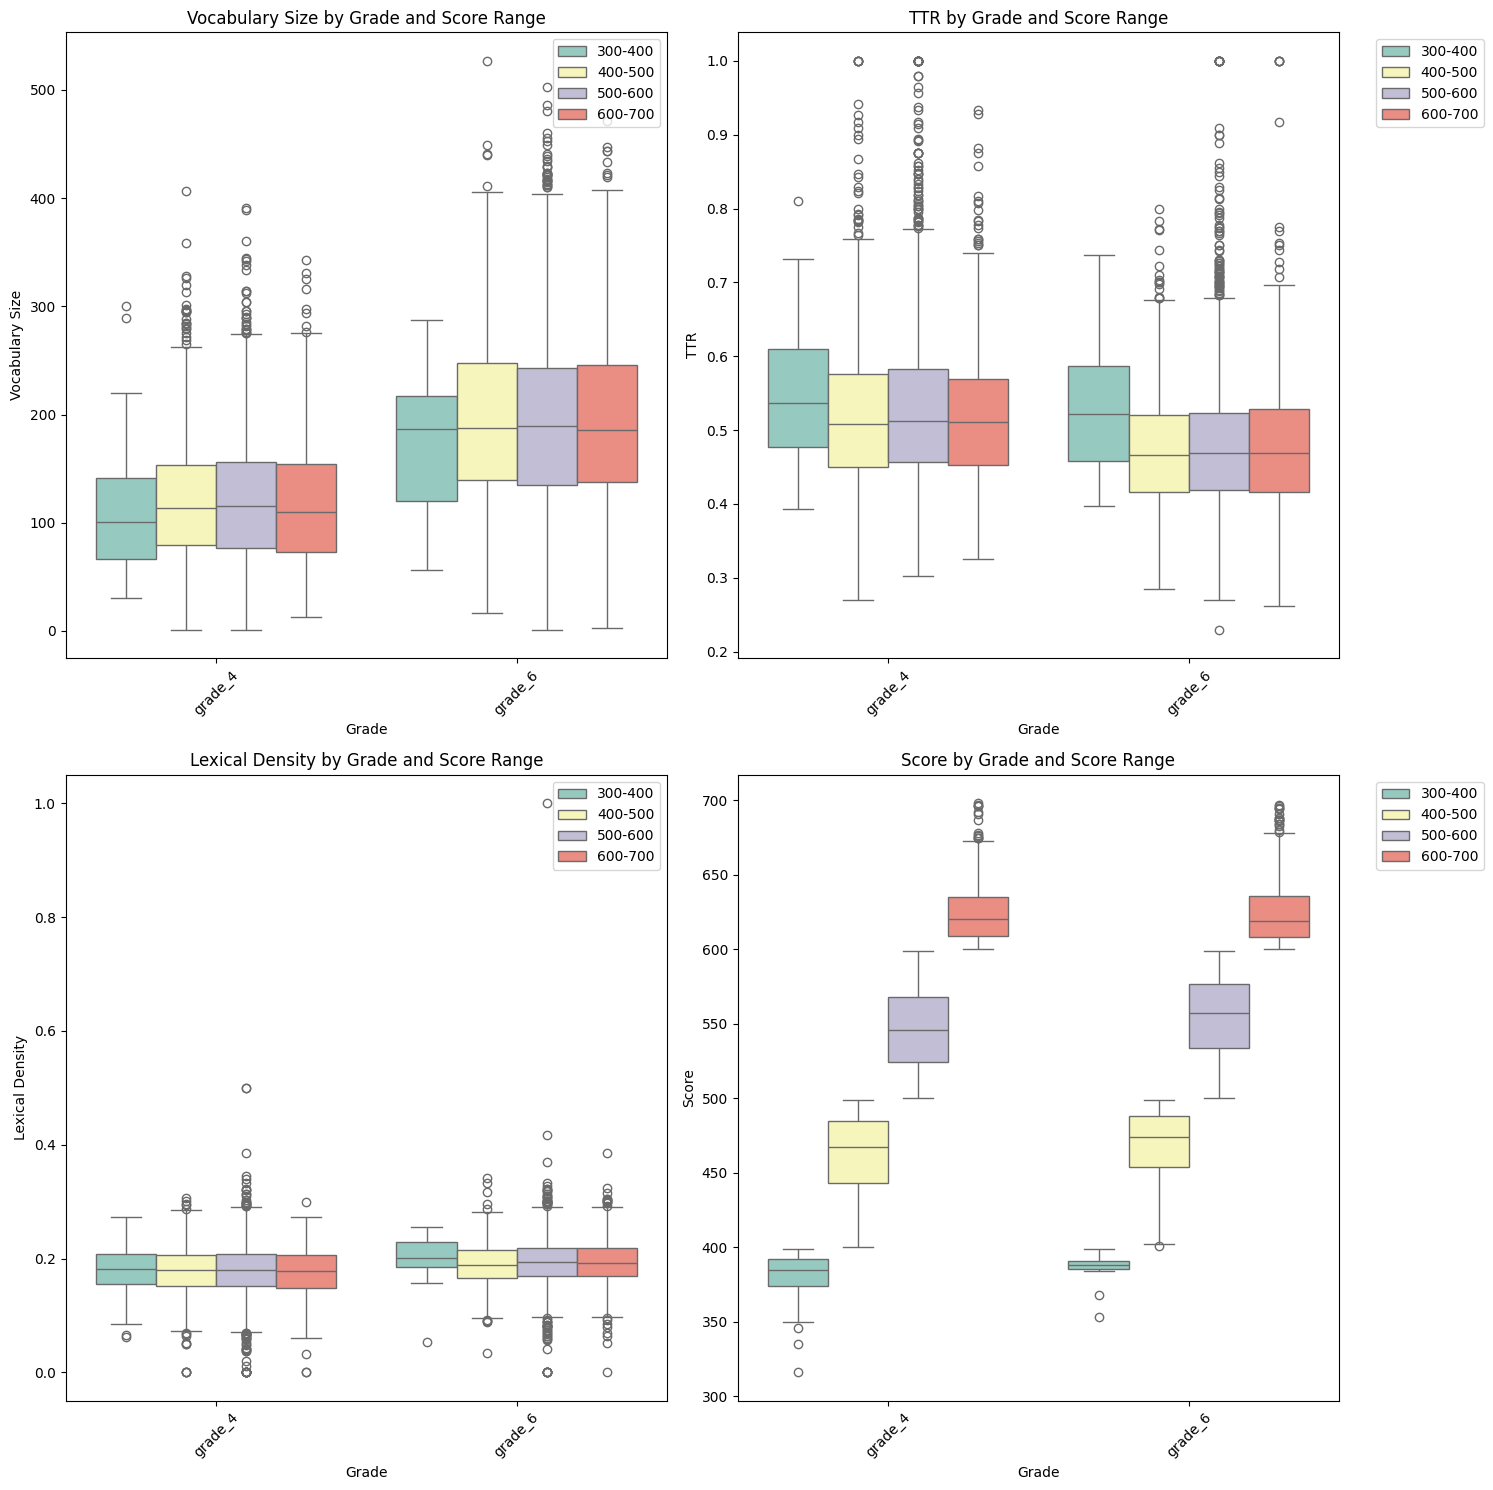


Statistical Tests (Grade 4 vs Grade 6):

Vocabulary Size:
t-statistic: -45.1130
p-value: 0.0000
Significant difference: Yes

TTR:
t-statistic: 21.3169
p-value: 0.0000
Significant difference: Yes

Lexical Density:
t-statistic: -14.6208
p-value: 0.0000
Significant difference: Yes

Score:
t-statistic: -21.8594
p-value: 0.0000
Significant difference: Yes

Summary Statistics:

GRADE_4:
Vocabulary Size:
  Mean: 120.16
  Median: 114.00
  Std Dev: 59.34
TTR:
  Mean: 0.53
  Median: 0.51
  Std Dev: 0.11
Lexical Density:
  Mean: 0.18
  Median: 0.18
  Std Dev: 0.05
Score:
  Mean: 529.74
  Median: 534.00
  Std Dev: 59.68

GRADE_6:
Vocabulary Size:
  Mean: 193.28
  Median: 189.00
  Std Dev: 81.41
TTR:
  Mean: 0.48
  Median: 0.47
  Std Dev: 0.09
Lexical Density:
  Mean: 0.19
  Median: 0.19
  Std Dev: 0.04
Score:
  Mean: 557.46
  Median: 562.00
  Std Dev: 52.35


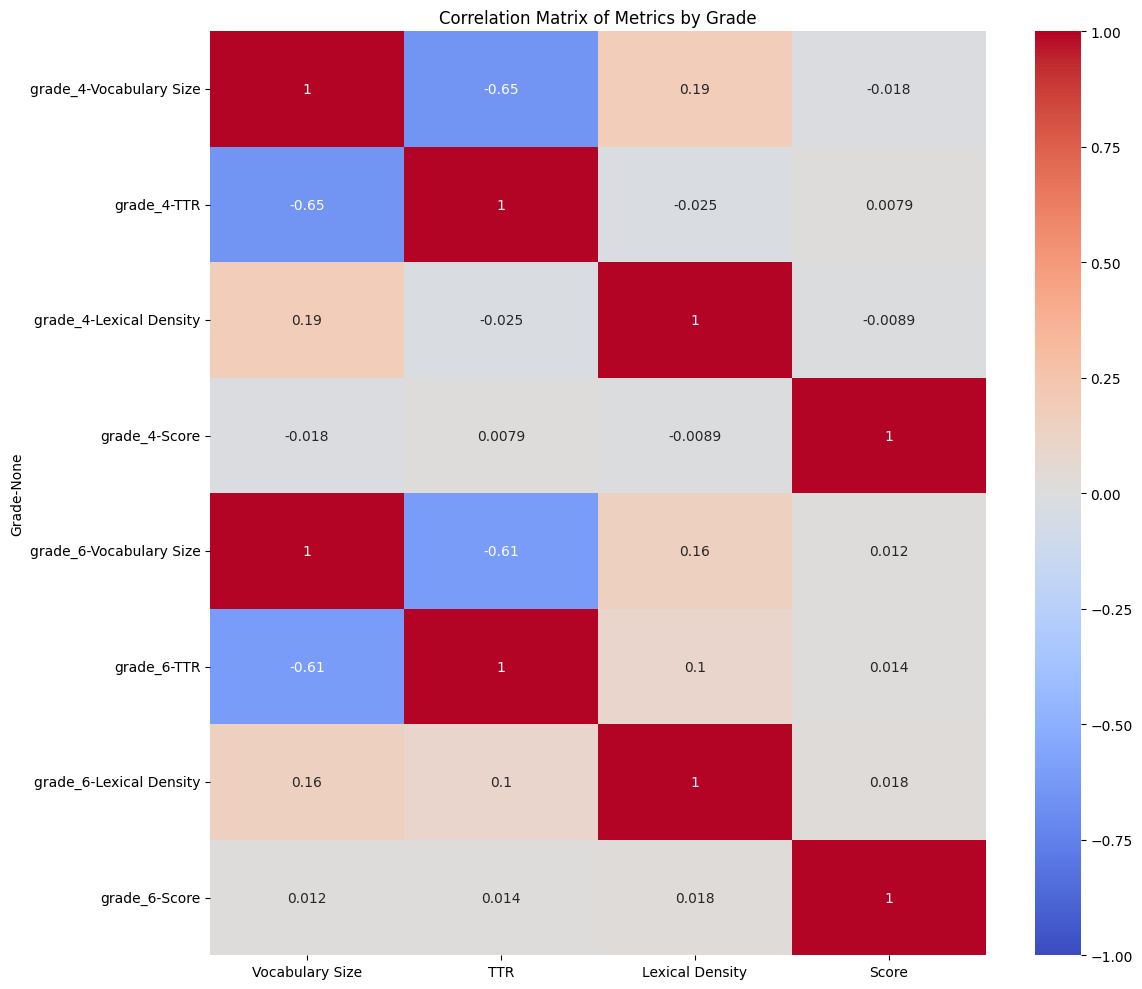

In [21]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_metrics(text):
    words = preprocess_text(text)
    unique_words = set(words)
    
    # Vocabulary Size
    vocab_size = len(unique_words)
    
    # Type-Token Ratio (TTR)
    ttr = len(unique_words) / len(words) if words else 0
    
    # Lexical Density (assuming content words are nouns, verbs, adjectives, and adverbs)
    content_words = [w for w in words if simple_pos_tag(w) in ['NOUN', 'VERB', 'ADJ', 'ADV']]
    lexical_density = len(content_words) / len(words) if words else 0
    
    return vocab_size, ttr, lexical_density

def simple_pos_tag(word):
    if word in ['the', 'a', 'an']:
        return 'DET'
    elif word in ['is', 'am', 'are', 'was', 'were']:
        return 'VERB'
    elif word in ['in', 'on', 'at', 'by', 'for']:
        return 'PREP'
    elif word.endswith('ly'):
        return 'ADV'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'VERB'
    elif word.endswith('s'):
        return 'NOUN'
    else:
        return 'OTHER'

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
data = []

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            # Extract score from filename
            score = int(filename.split('_')[-1].split('.')[0])
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            vocab_size, ttr, lexical_density = calculate_metrics(content)
            
            data.append({
                'Grade': grade,
                'Score Range': score_range,
                'Score': score,
                'Vocabulary Size': vocab_size,
                'TTR': ttr,
                'Lexical Density': lexical_density
            })

df = pd.DataFrame(data)

# Box Plot Analysis
plt.figure(figsize=(15, 15))
metrics = ['Vocabulary Size', 'TTR', 'Lexical Density', 'Score']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Grade', y=metric, hue='Score Range', data=df, palette='Set3')
    plt.title(f'{metric} by Grade and Score Range')
    plt.xticks(rotation=45)
    if i == 1 or i == 3:  # Adjust legend position for right subplots
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Statistical Tests
print("\nStatistical Tests (Grade 4 vs Grade 6):")
for metric in metrics:
    grade_4_data = df[df['Grade'] == 'grade_4'][metric]
    grade_6_data = df[df['Grade'] == 'grade_6'][metric]
    
    t_stat, p_value = stats.ttest_ind(grade_4_data, grade_6_data)
    
    print(f"\n{metric}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Summary Statistics
print("\nSummary Statistics:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    grade_data = df[df['Grade'] == grade]
    for metric in metrics:
        print(f"{metric}:")
        print(f"  Mean: {grade_data[metric].mean():.2f}")
        print(f"  Median: {grade_data[metric].median():.2f}")
        print(f"  Std Dev: {grade_data[metric].std():.2f}")

# Correlation Analysis
correlation_matrix = df.groupby('Grade')[metrics].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Metrics by Grade')
plt.tight_layout()
plt.show()

In [16]:
pip install spellcheck

Note: you may need to restart the kernel to use updated packages.


## Misspelled Words Analysis



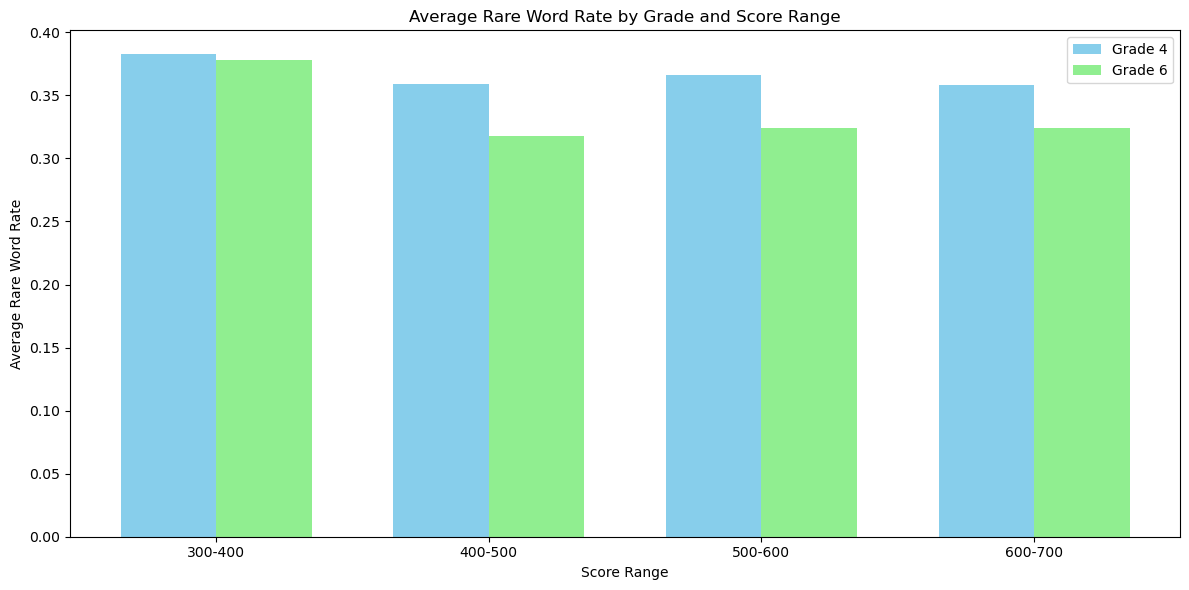

C:\Users\User\AppData\Local\Temp\ipykernel_27404\464168462.py:91: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.swarmplot(x='Score Range', y='Rare Word Ratio', hue='Grade', data=df,
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


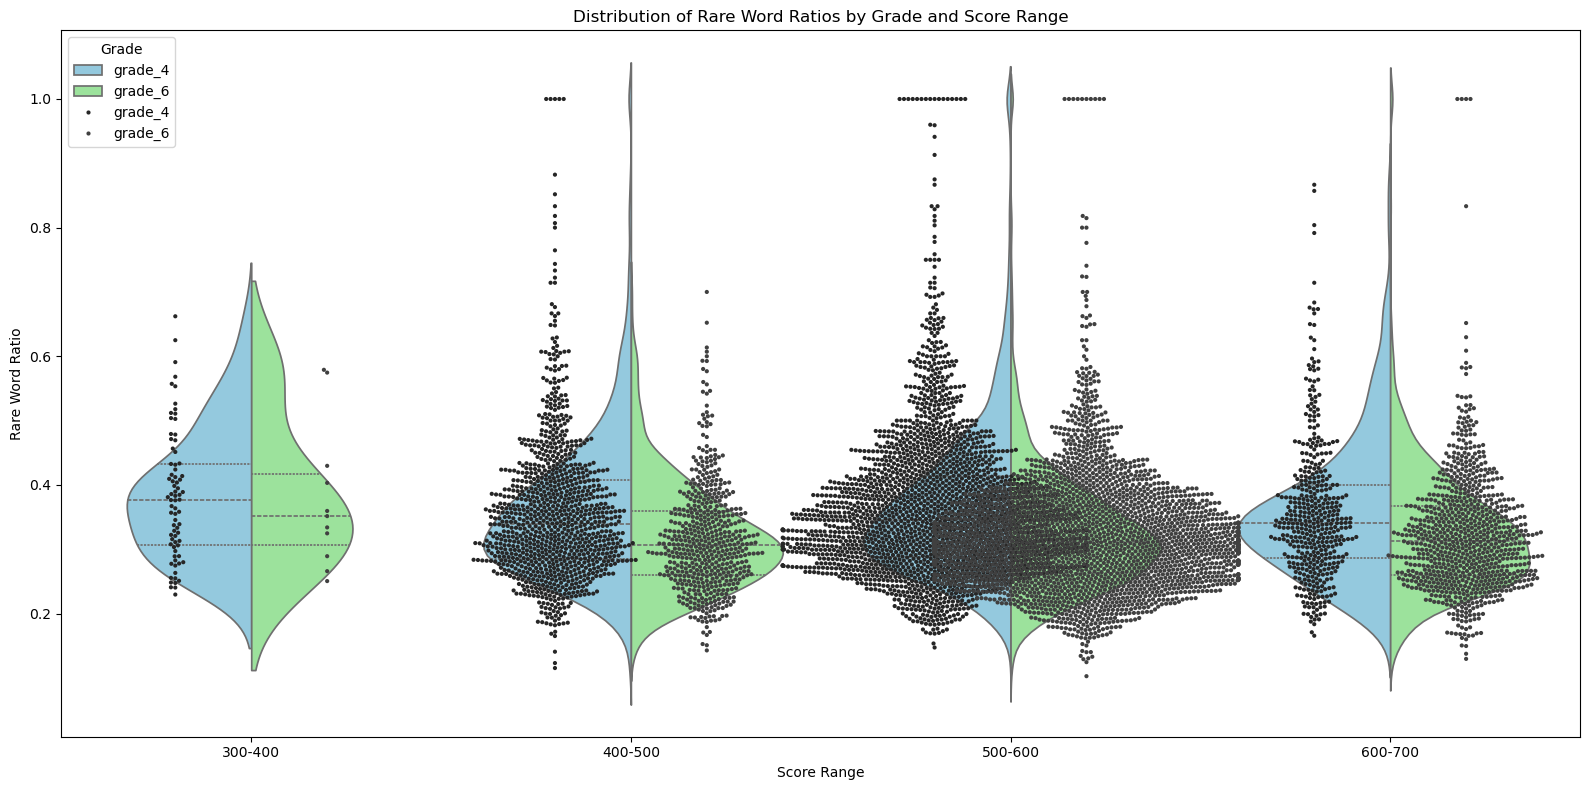

Summary of Rare Word Analysis:

GRADE_4:
  Score Range: 300-400
    Average Rare Word Rate: 0.3825
    Median Rare Word Rate: 0.3767
    Standard Deviation: 0.0983
  Score Range: 400-500
    Average Rare Word Rate: 0.3591
    Median Rare Word Rate: 0.3391
    Standard Deviation: 0.1135
  Score Range: 500-600
    Average Rare Word Rate: 0.3659
    Median Rare Word Rate: 0.3449
    Standard Deviation: 0.1188
  Score Range: 600-700
    Average Rare Word Rate: 0.3580
    Median Rare Word Rate: 0.3405
    Standard Deviation: 0.1092
  Most Common Rare Words:
    girl: 1293
    one: 1271
    end: 1202
    day: 1093
    time: 1040
    on: 1017
    got: 1010
    with: 1005
    at: 996
    go: 991

GRADE_6:
  Score Range: 300-400
    Average Rare Word Rate: 0.3783
    Median Rare Word Rate: 0.3515
    Standard Deviation: 0.1066
  Score Range: 400-500
    Average Rare Word Rate: 0.3176
    Median Rare Word Rate: 0.3070
    Standard Deviation: 0.0832
  Score Range: 500-600
    Average Rare Word Ra

In [9]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def analyze_word_frequency(text):
    words = preprocess_text(text)
    word_freq = Counter(words)
    total_words = len(words)
    rare_words = [word for word, count in word_freq.items() if count == 1]
    return total_words, len(rare_words), rare_words

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
score_ranges = ['300-400', '400-500', '500-600', '600-700']

results = {
    'grade_4': defaultdict(list),
    'grade_6': defaultdict(list)
}

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            total_words, rare_word_count, rare_words = analyze_word_frequency(content)
            
            results[grade][score_range].append({
                'total_words': total_words,
                'rare_word_count': rare_word_count,
                'rare_word_ratio': rare_word_count / total_words if total_words > 0 else 0,
                'rare_words': rare_words
            })

# Calculate average rare word rates
avg_rare_word_rates = {
    'grade_4': {},
    'grade_6': {}
}

for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        rates = [essay['rare_word_ratio'] for essay in results[grade][score_range]]
        avg_rare_word_rates[grade][score_range] = np.mean(rates)

# First graph: Bar chart (unchanged)
plt.figure(figsize=(12, 6))
x = np.arange(len(score_ranges))
width = 0.35

plt.bar(x - width/2, [avg_rare_word_rates['grade_4'][sr] for sr in score_ranges], width, label='Grade 4', color='skyblue')
plt.bar(x + width/2, [avg_rare_word_rates['grade_6'][sr] for sr in score_ranges], width, label='Grade 6', color='lightgreen')

plt.xlabel('Score Range')
plt.ylabel('Average Rare Word Rate')
plt.title('Average Rare Word Rate by Grade and Score Range')
plt.xticks(x, score_ranges)
plt.legend()

plt.tight_layout()
plt.show()

# Second graph: Violin plot with swarm plot overlay
plt.figure(figsize=(16, 8))

data = []
for grade in ['grade_4', 'grade_6']:
    for score_range in score_ranges:
        ratios = [essay['rare_word_ratio'] for essay in results[grade][score_range]]
        data.extend([(grade, score_range, ratio) for ratio in ratios])

df = pd.DataFrame(data, columns=['Grade', 'Score Range', 'Rare Word Ratio'])

# Violin plot
sns.violinplot(x='Score Range', y='Rare Word Ratio', hue='Grade', data=df, 
               split=True, inner="quartile", palette=['skyblue', 'lightgreen'])

# Swarm plot overlay
sns.swarmplot(x='Score Range', y='Rare Word Ratio', hue='Grade', data=df, 
              dodge=True, size=3, color=".25", linewidth=0)

plt.title('Distribution of Rare Word Ratios by Grade and Score Range')
plt.ylabel('Rare Word Ratio')
plt.legend(title='Grade')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary of Rare Word Analysis:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    all_rare_words = []
    for score_range in score_ranges:
        rare_word_ratios = [essay['rare_word_ratio'] for essay in results[grade][score_range]]
        all_rare_words.extend([word for essay in results[grade][score_range] for word in essay['rare_words']])
        
        print(f"  Score Range: {score_range}")
        print(f"    Average Rare Word Rate: {np.mean(rare_word_ratios):.4f}")
        print(f"    Median Rare Word Rate: {np.median(rare_word_ratios):.4f}")
        print(f"    Standard Deviation: {np.std(rare_word_ratios):.4f}")
    
    # Most common rare words
    common_rare_words = Counter(all_rare_words).most_common(10)
    print(f"  Most Common Rare Words:")
    for word, count in common_rare_words:
        print(f"    {word}: {count}")

Correlation Analysis:

GRADE_4:
Misspelling Rate       1.000000
TTR                    0.504864
Score                  0.022260
Avg Sentence Length   -0.000439
Lexical Density       -0.173737
Vocabulary Size       -0.387624
Name: Misspelling Rate, dtype: float64


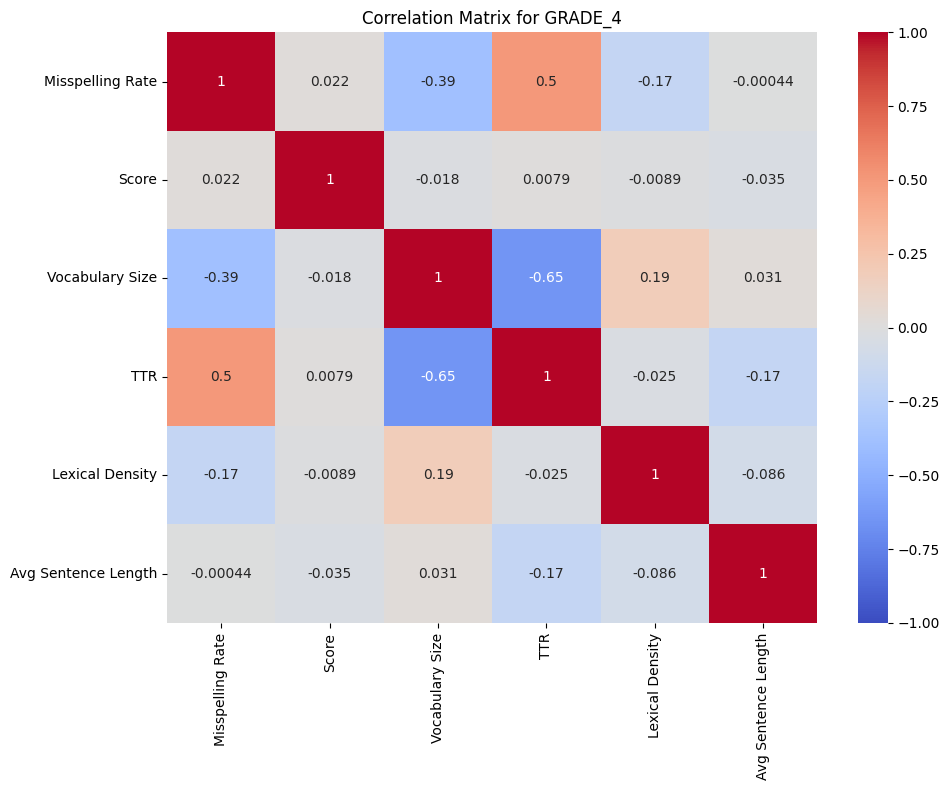


GRADE_6:
Misspelling Rate       1.000000
TTR                    0.440042
Avg Sentence Length    0.091977
Score                  0.012665
Lexical Density       -0.201493
Vocabulary Size       -0.348557
Name: Misspelling Rate, dtype: float64


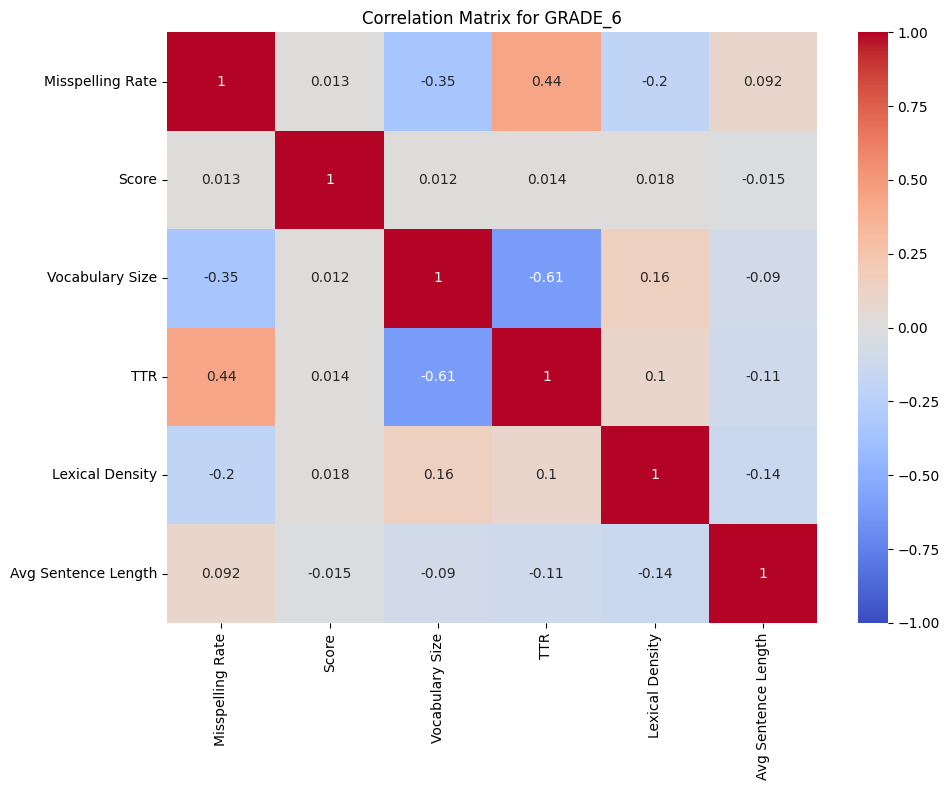

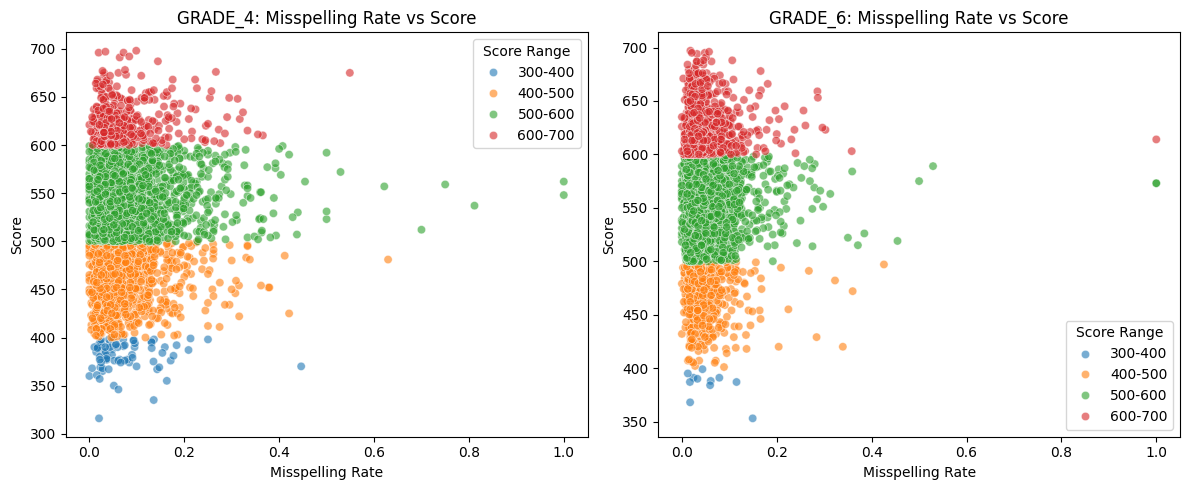

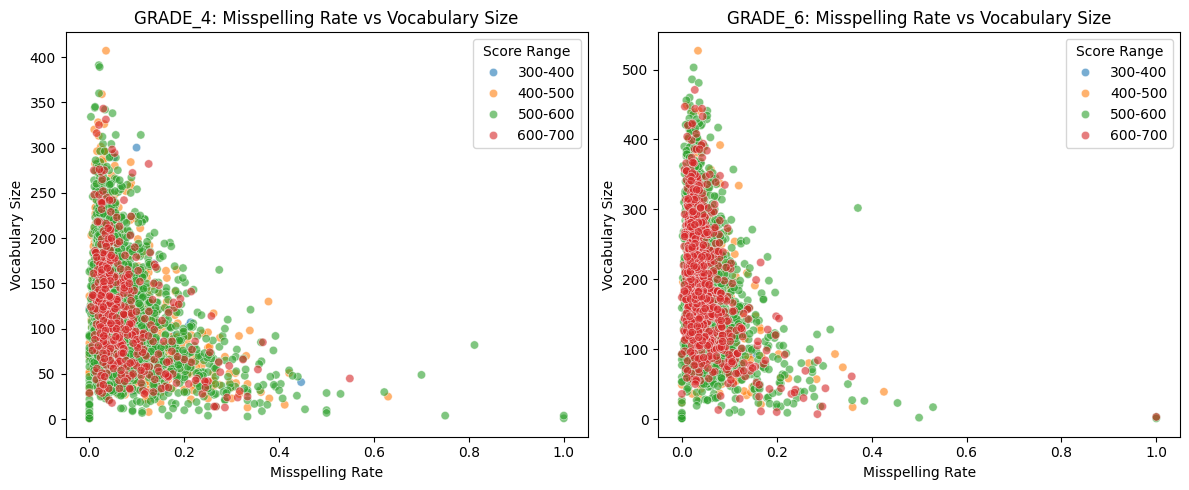

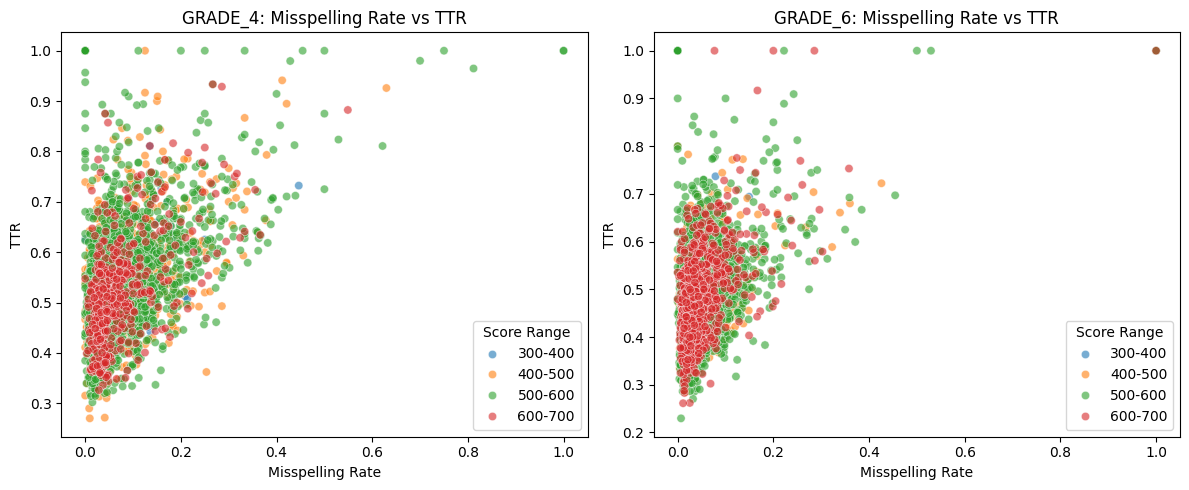

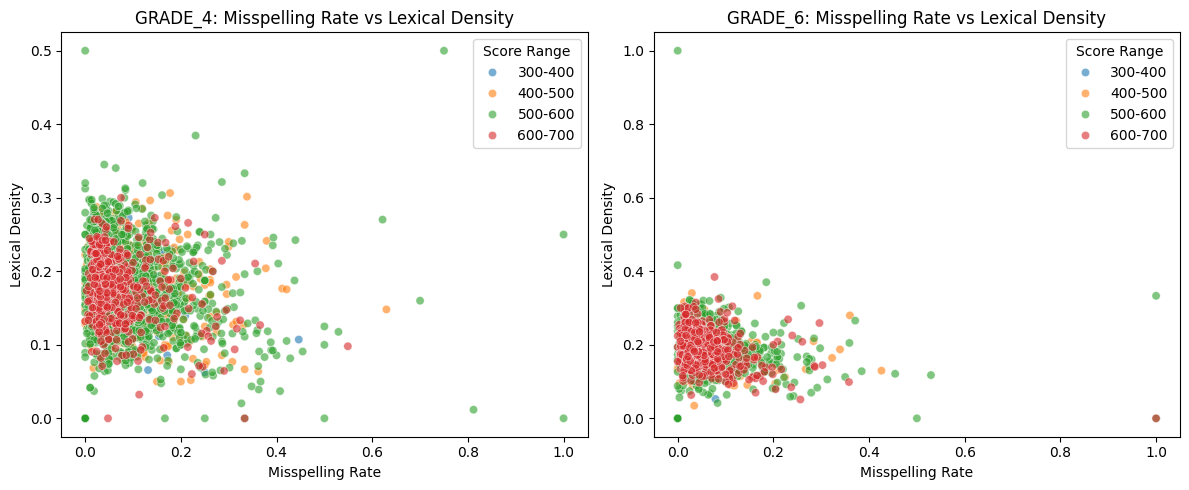

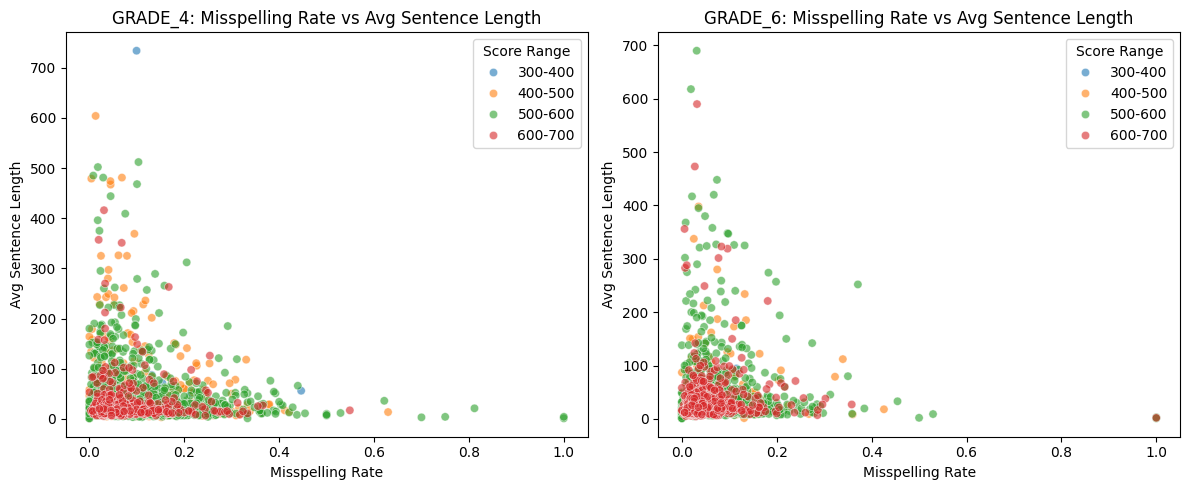


Statistical Tests (Correlation between Misspelling Rate and Other Features):

GRADE_4:
Score:
  Correlation coefficient: 0.0223
  p-value: 0.1714
  Significant: No
Vocabulary Size:
  Correlation coefficient: -0.3876
  p-value: 0.0000
  Significant: Yes
TTR:
  Correlation coefficient: 0.5049
  p-value: 0.0000
  Significant: Yes
Lexical Density:
  Correlation coefficient: -0.1737
  p-value: 0.0000
  Significant: Yes
Avg Sentence Length:
  Correlation coefficient: -0.0004
  p-value: 0.9785
  Significant: No

GRADE_6:
Score:
  Correlation coefficient: 0.0127
  p-value: 0.4210
  Significant: No
Vocabulary Size:
  Correlation coefficient: -0.3486
  p-value: 0.0000
  Significant: Yes
TTR:
  Correlation coefficient: 0.4400
  p-value: 0.0000
  Significant: Yes
Lexical Density:
  Correlation coefficient: -0.2015
  p-value: 0.0000
  Significant: Yes
Avg Sentence Length:
  Correlation coefficient: 0.0920
  p-value: 0.0000
  Significant: Yes


In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict
from spellchecker import SpellChecker

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def analyze_spelling(text):
    words = preprocess_text(text)
    spell = SpellChecker()
    misspelled = spell.unknown(words)
    return len(words), len(misspelled), list(misspelled)

def calculate_metrics(text):
    words = preprocess_text(text)
    unique_words = set(words)
    
    # Vocabulary Size
    vocab_size = len(unique_words)
    
    # Type-Token Ratio (TTR)
    ttr = len(unique_words) / len(words) if words else 0
    
    # Lexical Density
    content_words = [w for w in words if simple_pos_tag(w) in ['NOUN', 'VERB', 'ADJ', 'ADV']]
    lexical_density = len(content_words) / len(words) if words else 0
    
    # Average Sentence Length
    sentences = re.split(r'[.!?]+', text)
    avg_sentence_length = np.mean([len(sentence.split()) for sentence in sentences if sentence.strip()])
    
    return vocab_size, ttr, lexical_density, avg_sentence_length

def simple_pos_tag(word):
    if word in ['the', 'a', 'an']:
        return 'DET'
    elif word in ['is', 'am', 'are', 'was', 'were']:
        return 'VERB'
    elif word in ['in', 'on', 'at', 'by', 'for']:
        return 'PREP'
    elif word.endswith('ly'):
        return 'ADV'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'VERB'
    elif word.endswith('s'):
        return 'NOUN'
    else:
        return 'OTHER'

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
data = []

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            # Extract score from filename
            score = int(filename.split('_')[-1].split('.')[0])
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            total_words, misspelled_count, _ = analyze_spelling(content)
            vocab_size, ttr, lexical_density, avg_sentence_length = calculate_metrics(content)
            
            data.append({
                'Grade': grade,
                'Score Range': score_range,
                'Score': score,
                'Misspelling Rate': misspelled_count / total_words if total_words > 0 else 0,
                'Vocabulary Size': vocab_size,
                'TTR': ttr,
                'Lexical Density': lexical_density,
                'Avg Sentence Length': avg_sentence_length
            })

df = pd.DataFrame(data)

# Correlation Analysis
print("Correlation Analysis:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    grade_data = df[df['Grade'] == grade]
    correlation_matrix = grade_data[['Misspelling Rate', 'Score', 'Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length']].corr()
    print(correlation_matrix['Misspelling Rate'].sort_values(ascending=False))

    # Visualize correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Matrix for {grade.upper()}')
    plt.tight_layout()
    plt.show()

# Scatter plots
features = ['Score', 'Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length']
for feature in features:
    plt.figure(figsize=(12, 5))
    for i, grade in enumerate(['grade_4', 'grade_6']):
        plt.subplot(1, 2, i+1)
        grade_data = df[df['Grade'] == grade]
        sns.scatterplot(x='Misspelling Rate', y=feature, data=grade_data, hue='Score Range', alpha=0.6)
        plt.title(f'{grade.upper()}: Misspelling Rate vs {feature}')
        plt.xlabel('Misspelling Rate')
        plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Statistical tests
print("\nStatistical Tests (Correlation between Misspelling Rate and Other Features):")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    grade_data = df[df['Grade'] == grade]
    for feature in features:
        correlation, p_value = stats.pearsonr(grade_data['Misspelling Rate'], grade_data[feature])
        print(f"{feature}:")
        print(f"  Correlation coefficient: {correlation:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Section 3: Statistical Analysis

## Code Overview
- Calculated descriptive statistics for each metric (Vocabulary Size, TTR, Lexical Density, Avg Sentence Length, Score) by grade.
- Performed correlation analysis between metrics and scores.
- Conducted comparative analysis (t-tests) between Grade 4 and Grade 6 for each metric.
- Visualized distributions and comparisons using box plots.

## Key Findings

### Descriptive Statistics
- Grade 6 students generally have higher mean values for Vocabulary Size, Lexical Density, and Scores compared to Grade 4.
- Grade 4 students have slightly higher mean TTR and Avg Sentence Length.

### Correlation Analysis
- Weak correlations between linguistic metrics and scores for both grades.
- Most correlations are not statistically significant (p > 0.05).
- Slight negative correlation between Avg Sentence Length and Score in Grade 4 (r = -0.0354, p = 0.0295).

### Comparative Analysis
- Statistically significant differences (p < 0.05) between Grade 4 and Grade 6 for all metrics.
- Largest difference observed in Vocabulary Size (t = -45.1130).
- TTR shows a significant decrease from Grade 4 to Grade 6 (t = 21.3169).

## Results Interpretation
1. Vocabulary growth is evident as students progress from Grade 4 to Grade 6.
2. Lower TTR in Grade 6 suggests more word repetition, possibly due to longer essays.
3. Slight increase in Lexical Density indicates more content words used in Grade 6.
4. Weak correlations suggest that these linguistic features alone may not strongly predict essay scores.
5. Significant differences between grades indicate clear developmental changes in writing skills.

These findings highlight the complex nature of writing development and suggest that multiple factors beyond basic linguistic metrics contribute to essay quality and scores.

3.1 Descriptive Statistics:

GRADE_4:

Vocabulary Size:
count    3776.000000
mean      120.161547
std        59.341895
min         1.000000
25%        76.750000
50%       114.000000
75%       155.000000
max       407.000000
Name: Vocabulary Size, dtype: float64

TTR:
count    3776.000000
mean        0.526339
std         0.107240
min         0.269968
25%         0.454708
50%         0.511420
75%         0.579832
max         1.000000
Name: TTR, dtype: float64

Lexical Density:
count    3776.000000
mean        0.178797
std         0.045938
min         0.000000
25%         0.151855
50%         0.179221
75%         0.207420
max         0.500000
Name: Lexical Density, dtype: float64

Avg Sentence Length:
count    3776.000000
mean       31.337001
std        46.707282
min         1.000000
25%        12.899138
50%        18.513158
75%        29.913636
max       734.000000
Name: Avg Sentence Length, dtype: float64

Score:
count    3776.000000
mean      529.744968
std        59.678306
min       3

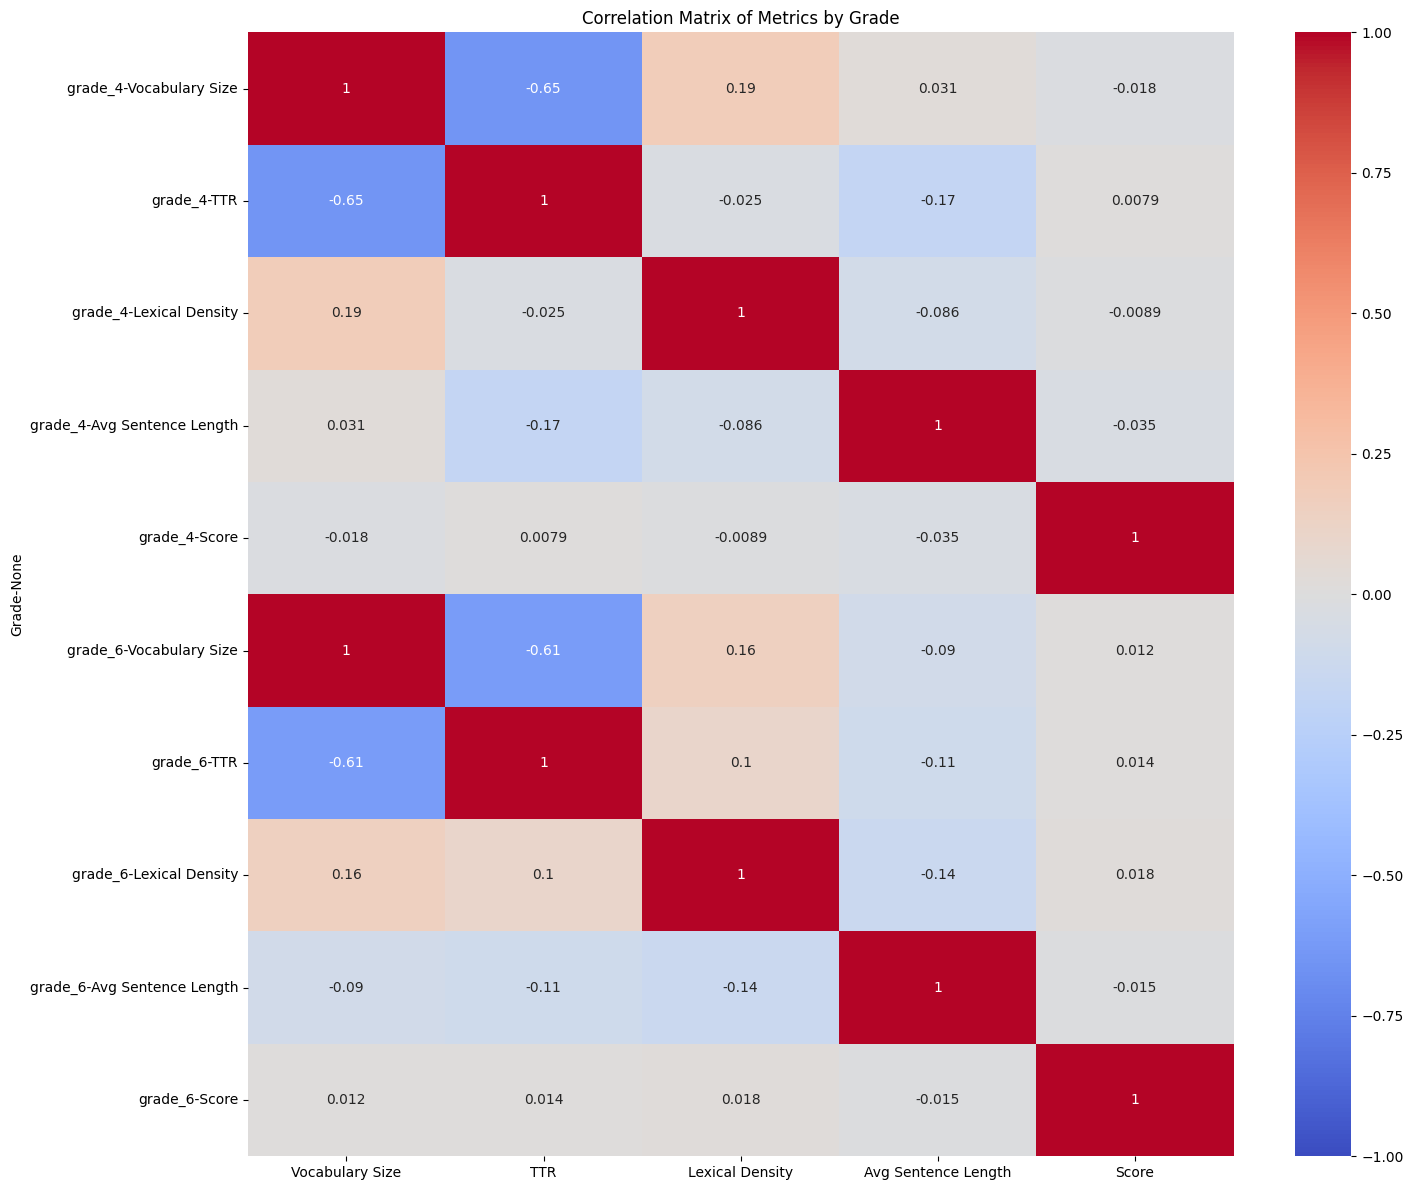


GRADE_4 - Correlation with Scores:
Vocabulary Size: Correlation = -0.0182, p-value = 0.2636
TTR: Correlation = 0.0079, p-value = 0.6284
Lexical Density: Correlation = -0.0089, p-value = 0.5864
Avg Sentence Length: Correlation = -0.0354, p-value = 0.0295

GRADE_6 - Correlation with Scores:
Vocabulary Size: Correlation = 0.0117, p-value = 0.4560
TTR: Correlation = 0.0144, p-value = 0.3619
Lexical Density: Correlation = 0.0176, p-value = 0.2622
Avg Sentence Length: Correlation = -0.0145, p-value = 0.3560

3.3 Comparative Analysis:

Vocabulary Size:
t-statistic: -45.1130
p-value: 0.0000
Significant difference: Yes

TTR:
t-statistic: 21.3169
p-value: 0.0000
Significant difference: Yes

Lexical Density:
t-statistic: -14.6208
p-value: 0.0000
Significant difference: Yes

Avg Sentence Length:
t-statistic: 2.8621
p-value: 0.0042
Significant difference: Yes

Score:
t-statistic: -21.8594
p-value: 0.0000
Significant difference: Yes


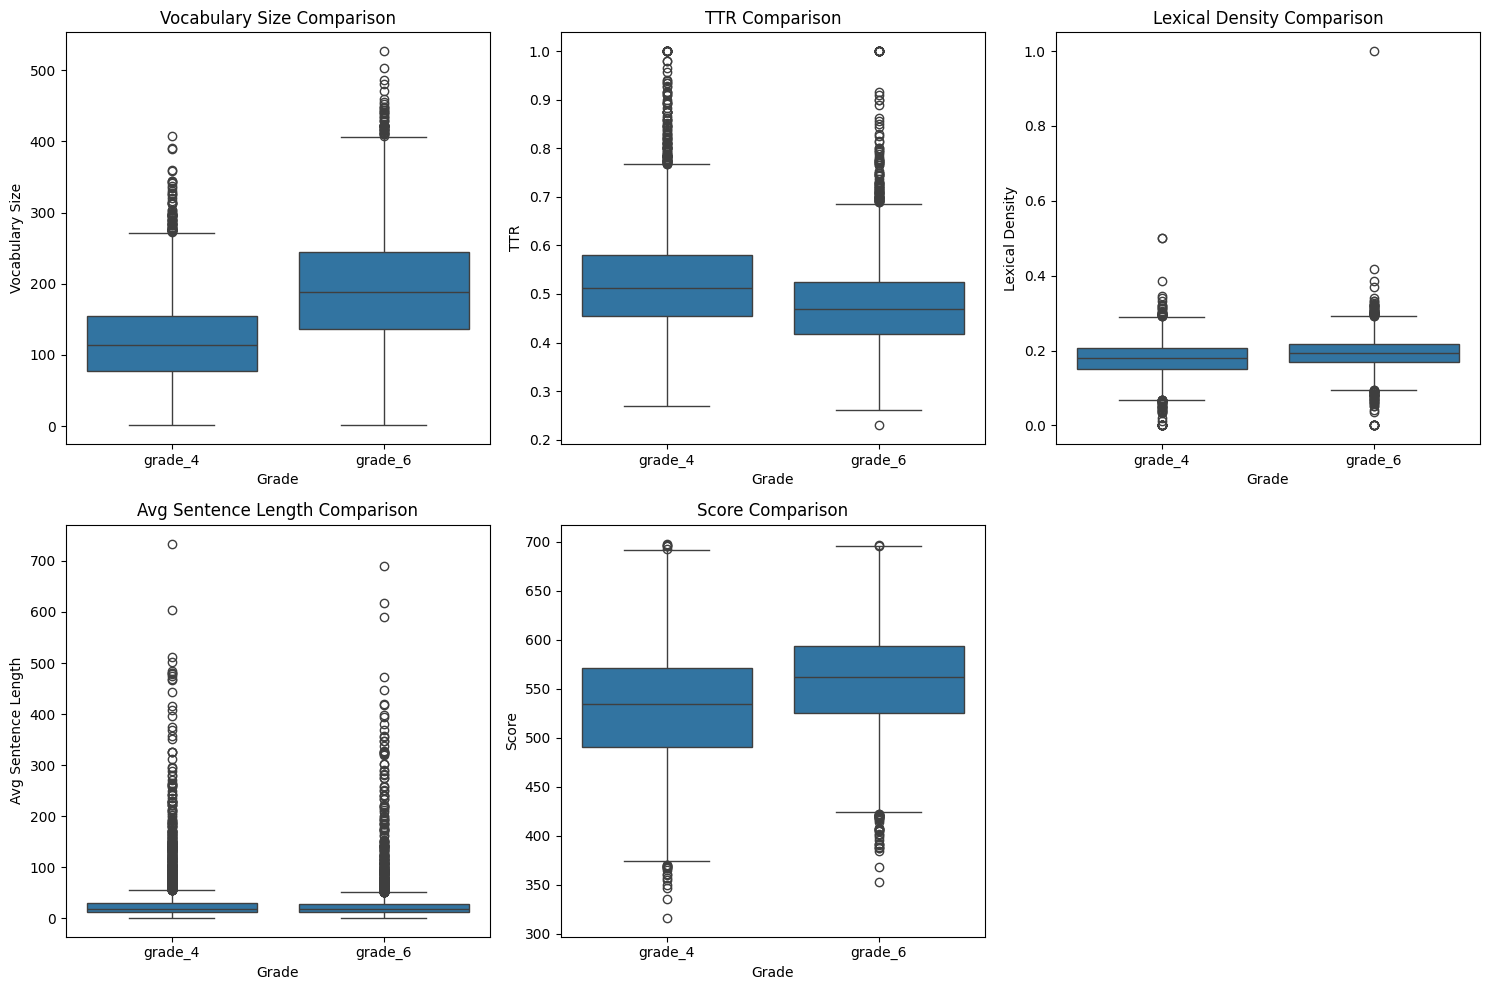

In [2]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_metrics(text):
    words = preprocess_text(text)
    unique_words = set(words)
    
    # Vocabulary Size
    vocab_size = len(unique_words)
    
    # Type-Token Ratio (TTR)
    ttr = len(unique_words) / len(words) if words else 0
    
    # Lexical Density
    content_words = [w for w in words if simple_pos_tag(w) in ['NOUN', 'VERB', 'ADJ', 'ADV']]
    lexical_density = len(content_words) / len(words) if words else 0
    
    # Average Sentence Length
    sentences = re.split(r'[.!?]+', text)
    avg_sentence_length = np.mean([len(sentence.split()) for sentence in sentences if sentence.strip()])
    
    return vocab_size, ttr, lexical_density, avg_sentence_length

def simple_pos_tag(word):
    if word in ['the', 'a', 'an']:
        return 'DET'
    elif word in ['is', 'am', 'are', 'was', 'were']:
        return 'VERB'
    elif word in ['in', 'on', 'at', 'by', 'for']:
        return 'PREP'
    elif word.endswith('ly'):
        return 'ADV'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'VERB'
    elif word.endswith('s'):
        return 'NOUN'
    else:
        return 'OTHER'

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
data = []

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            # Extract score from filename
            score = int(filename.split('_')[-1].split('.')[0])
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            vocab_size, ttr, lexical_density, avg_sentence_length = calculate_metrics(content)
            
            data.append({
                'Grade': grade,
                'Score Range': score_range,
                'Score': score,
                'Vocabulary Size': vocab_size,
                'TTR': ttr,
                'Lexical Density': lexical_density,
                'Avg Sentence Length': avg_sentence_length
            })

df = pd.DataFrame(data)

# 3.1 Descriptive Statistics
print("3.1 Descriptive Statistics:")
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()}:")
    grade_data = df[df['Grade'] == grade]
    for metric in ['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length', 'Score']:
        print(f"\n{metric}:")
        print(grade_data[metric].describe())

# 3.2 Correlation Analysis
print("\n3.2 Correlation Analysis:")
correlation_matrix = df.groupby('Grade')[['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length', 'Score']].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Metrics by Grade')
plt.tight_layout()
plt.show()

# Calculate Pearson's correlation coefficient between each feature and essay scores
for grade in ['grade_4', 'grade_6']:
    print(f"\n{grade.upper()} - Correlation with Scores:")
    grade_data = df[df['Grade'] == grade]
    for metric in ['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length']:
        correlation, p_value = stats.pearsonr(grade_data[metric], grade_data['Score'])
        print(f"{metric}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")

# 3.3 Comparative Analysis
print("\n3.3 Comparative Analysis:")
for metric in ['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length', 'Score']:
    grade_4_data = df[df['Grade'] == 'grade_4'][metric]
    grade_6_data = df[df['Grade'] == 'grade_6'][metric]
    
    t_stat, p_value = stats.ttest_ind(grade_4_data, grade_6_data)
    
    print(f"\n{metric}:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Visualize the differences between Grade 4 and Grade 6
plt.figure(figsize=(15, 10))
for i, metric in enumerate(['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length', 'Score']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Grade', y=metric, data=df)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

# Section 4: Regression Analysis

## Code Overview
- **Feature Selection**: Key features such as **Vocabulary Size**, **TTR**, **Lexical Density**, and **Avg Sentence Length** were used as independent variables to predict essay scores.
- **Model Training**: A **linear regression model** was trained on the dataset, using **80% of the data** for training and **20% for testing**.
- **Evaluation Metrics**: The model's performance was evaluated using **R-squared** and **Mean Absolute Error (MAE)**.
- **Feature Importance**: The regression coefficients were analyzed to identify which features most significantly impacted essay scores.
- **Visualizations**: 
  - **Scatter plots** to compare actual vs predicted scores.
  - **Residual plots** to visualize prediction errors.
  - **Bar plots** to show feature importance.

---

## Key Findings

### Model Performance
- **R-squared**: The model explained **0.41%** of the variance in essay scores. This suggests that the selected linguistic features alone have **limited predictive power** for essay scores.
- **Mean Absolute Error (MAE)**: The average deviation between the actual and predicted scores was **47.19 points**, indicating a relatively large prediction error.
  
### Feature Importance
- **Lexical Density** had the largest impact on essay scores, with a coefficient of **32.71**. This implies that a one-unit increase in Lexical Density is associated with a **32-point increase** in predicted scores.
- **TTR** also had a notable positive impact, with a coefficient of **17.08**.
- **Vocabulary Size** had a much smaller effect (coefficient = **0.0898**), suggesting that the sheer number of unique words does not strongly influence scores.
- **Avg Sentence Length** had a slight negative impact (coefficient = **-0.032**), indicating that longer sentences might not necessarily improve scores.

---

## Results Interpretation

1. **Lexical Complexity**:
   - **Lexical Density** and **TTR** were the most important predictors of essay scores. This suggests that **content-rich** and **diverse vocabulary** plays a significant role in essay quality.
   
2. **Vocabulary Size**:
   - The relatively small coefficient for Vocabulary Size indicates that using more unique words does not directly lead to higher scores. It may suggest that the **quality** of word choice (Lexical Density) is more important than the quantity.
   
3. **Sentence Length**:
   - The slight negative relationship between sentence length and scores suggests that overly long sentences may detract from clarity and coherence, reducing the overall score.

4. **Weak Predictive Power**:
   - The **low R-squared** value indicates that these linguistic features alone do not capture the full complexity of what makes a good essay. **Other factors**, such as **essay structure**, **argument quality**, or **coherence**, may play a more significant role in determining scores.

---

## Visualizations

1. **Predicted vs Actual Scores**: 
   - The scatter plot shows a weak alignment between predicted and actual scores, with high variance around the prediction line, further demonstrating the model’s limited predictive ability.

2. **Residual Plot**:
   - The residuals were randomly distributed around zero, suggesting that the model’s predictions were unbiased, though not particularly accurate.

3. **Feature Importance**:
   - The bar plot highlighted **Lexical Density** as the most influential feature, followed by **TTR**, with **Vocabulary Size** and **Avg Sentence Length** contributing much less.

---

## Conclusion

The **regression model** provides useful insights into how various linguistic features relate to essay scores but reveals that these features alone are not sufficient to **accurately predict** scores. **Lexical Density** and **TTR** are the most important features, while **Vocabulary Size** and **Avg Sentence Length** have limited impact. Further analysis incorporating more **advanced features** or **essay structure** could improve predictive power.


Model Performance:
R-squared: 0.0041
Mean Absolute Error: 47.1924


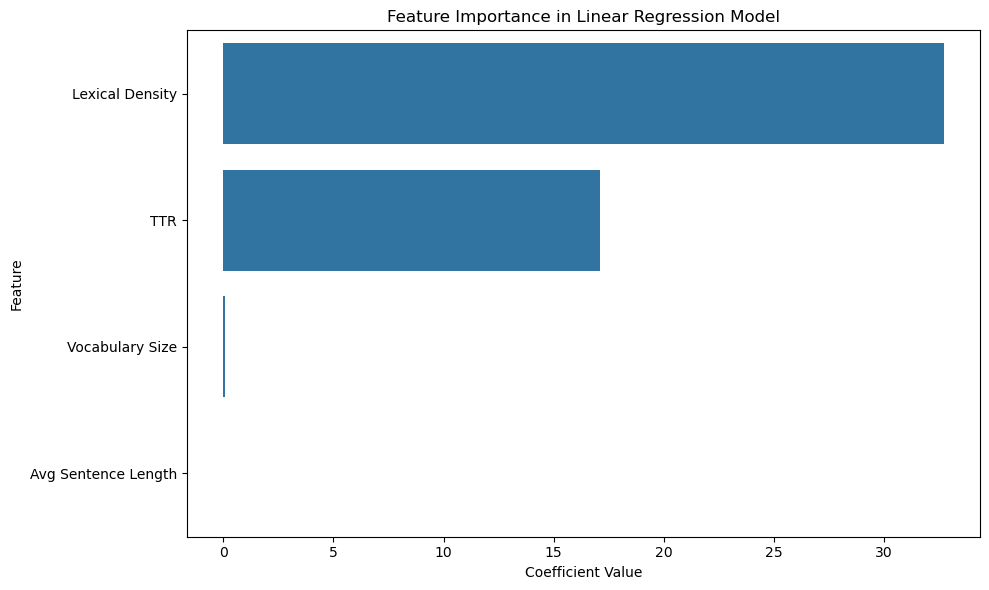

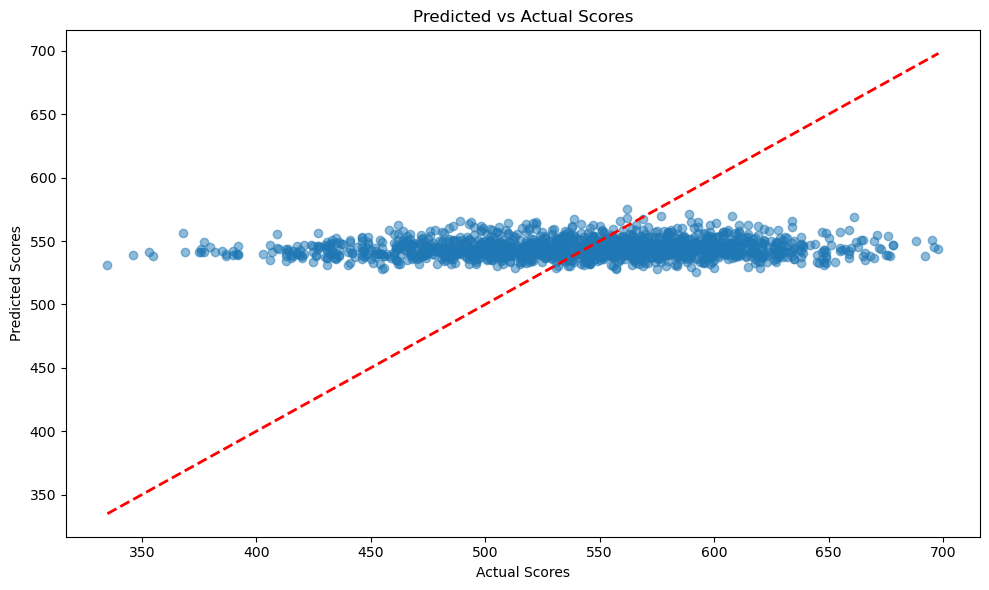

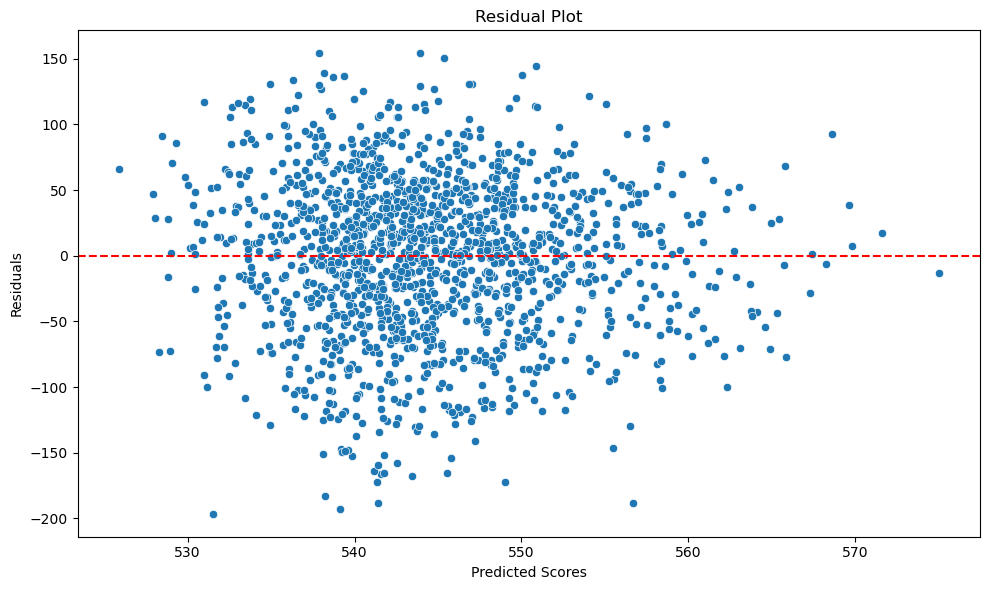


Coefficient Summary:
               Feature  Coefficient  Abs_Coefficient
2      Lexical Density    32.712770        32.712770
1                  TTR    17.079681        17.079681
0      Vocabulary Size     0.089871         0.089871
3  Avg Sentence Length    -0.032003         0.032003

Model Interpretation:
The model explains 0.41% of the variance in the essay scores.
On average, the model's predictions deviate from the actual scores by 47.19 points.

The most important feature is 'Lexical Density' with a coefficient of 32.7128.
This means that a one-unit increase in Lexical Density is associated with a 32.7128 increase in the predicted score, holding other features constant.


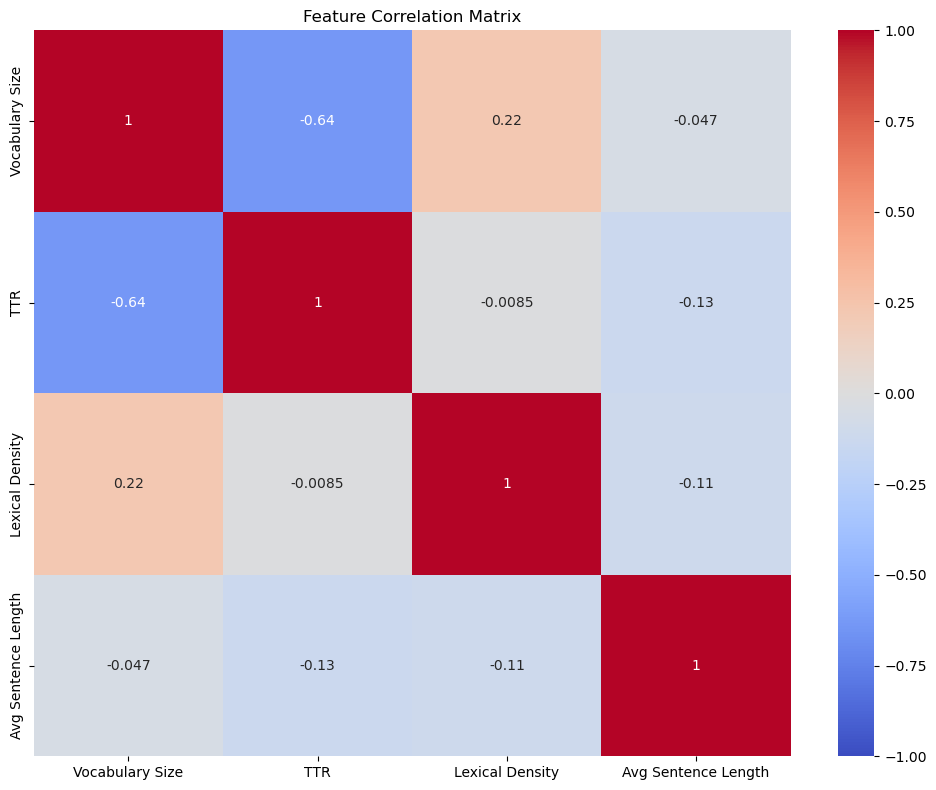


Multicollinearity Check:
If any features show high correlation (> 0.8 or < -0.8) with each other, consider removing one of them to reduce multicollinearity.


In [13]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_metrics(text):
    words = preprocess_text(text)
    unique_words = set(words)
    
    # Vocabulary Size
    vocab_size = len(unique_words)
    
    # Type-Token Ratio (TTR)
    ttr = len(unique_words) / len(words) if words else 0
    
    # Lexical Density
    content_words = [w for w in words if simple_pos_tag(w) in ['NOUN', 'VERB', 'ADJ', 'ADV']]
    lexical_density = len(content_words) / len(words) if words else 0
    
    # Average Sentence Length
    sentences = re.split(r'[.!?]+', text)
    avg_sentence_length = np.mean([len(sentence.split()) for sentence in sentences if sentence.strip()])
    
    return vocab_size, ttr, lexical_density, avg_sentence_length

def simple_pos_tag(word):
    if word in ['the', 'a', 'an']:
        return 'DET'
    elif word in ['is', 'am', 'are', 'was', 'were']:
        return 'VERB'
    elif word in ['in', 'on', 'at', 'by', 'for']:
        return 'PREP'
    elif word.endswith('ly'):
        return 'ADV'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'VERB'
    elif word.endswith('s'):
        return 'NOUN'
    else:
        return 'OTHER'

# Data loading
base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
data = []

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            score_range = path_parts[-3]
            
            # Extract score from filename
            score = int(filename.split('_')[-1].split('.')[0])
            
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            vocab_size, ttr, lexical_density, avg_sentence_length = calculate_metrics(content)
            
            data.append({
                'Grade': grade,
                'Score Range': score_range,
                'Score': score,
                'Vocabulary Size': vocab_size,
                'TTR': ttr,
                'Lexical Density': lexical_density,
                'Avg Sentence Length': avg_sentence_length
            })

df = pd.DataFrame(data)

# Prepare features and target variable
features = ['Vocabulary Size', 'TTR', 'Lexical Density', 'Avg Sentence Length']
X = df[features]
y = df['Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_
})
feature_importance = feature_importance.reindex(feature_importance['Importance'].abs().sort_values(ascending=False).index)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Predicted vs Actual Scores')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Print summary of coefficients
coef_summary = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': abs(model.coef_)
})
coef_summary = coef_summary.sort_values('Abs_Coefficient', ascending=False)
print("\nCoefficient Summary:")
print(coef_summary)

# Interpret results
print("\nModel Interpretation:")
print(f"The model explains {r2:.2%} of the variance in the essay scores.")
print(f"On average, the model's predictions deviate from the actual scores by {mae:.2f} points.")
print(f"\nThe most important feature is '{coef_summary.iloc[0]['Feature']}' with a coefficient of {coef_summary.iloc[0]['Coefficient']:.4f}.")
print(f"This means that a one-unit increase in {coef_summary.iloc[0]['Feature']} is associated with a {abs(coef_summary.iloc[0]['Coefficient']):.4f} {'increase' if coef_summary.iloc[0]['Coefficient'] > 0 else 'decrease'} in the predicted score, holding other features constant.")

# Check for multicollinearity
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nMulticollinearity Check:")
print("If any features show high correlation (> 0.8 or < -0.8) with each other, consider removing one of them to reduce multicollinearity.")

# Text Analysis of Highest Scoring Student Essays

This code analyzes text data from a categorized dataset, focusing on the highest scoring texts within specific grade levels. It starts by defining functions for text preprocessing, vocabulary size calculation, and sentence length measurement. The script then navigates through the dataset directories, identifying the highest scoring text files for grades 4 and 6. Once these texts are identified, the code computes their vocabulary sizes and sentence lengths. It visualizes these linguistic features using bar charts and line plots, and finally, it outputs statistical summaries for sentence lengths, including mean, median, and standard deviation, for further analysis.


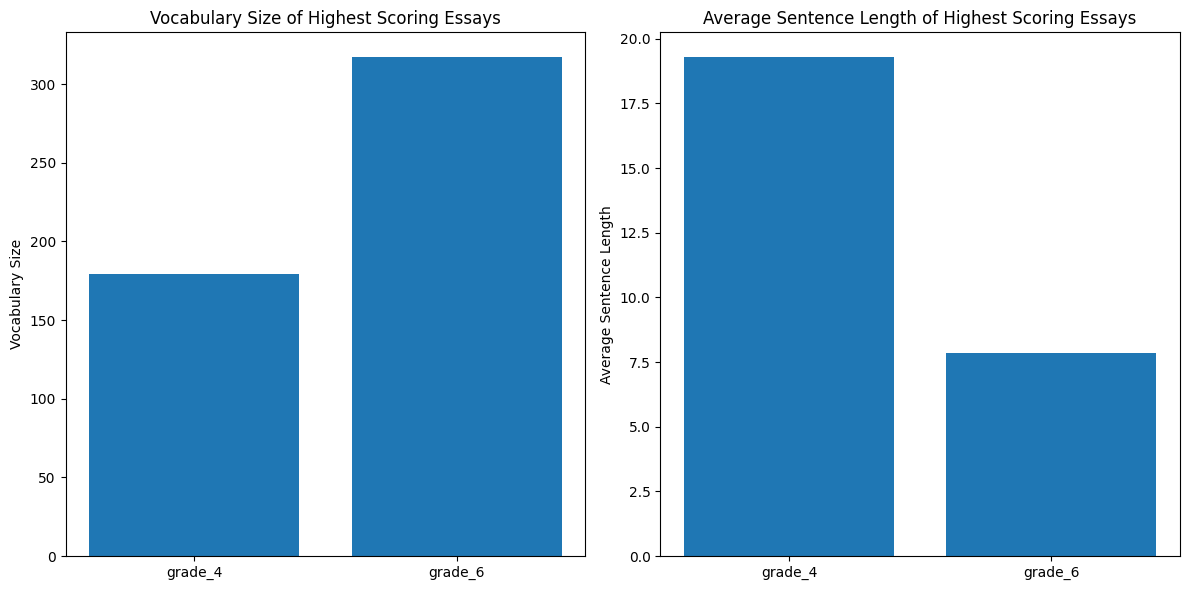

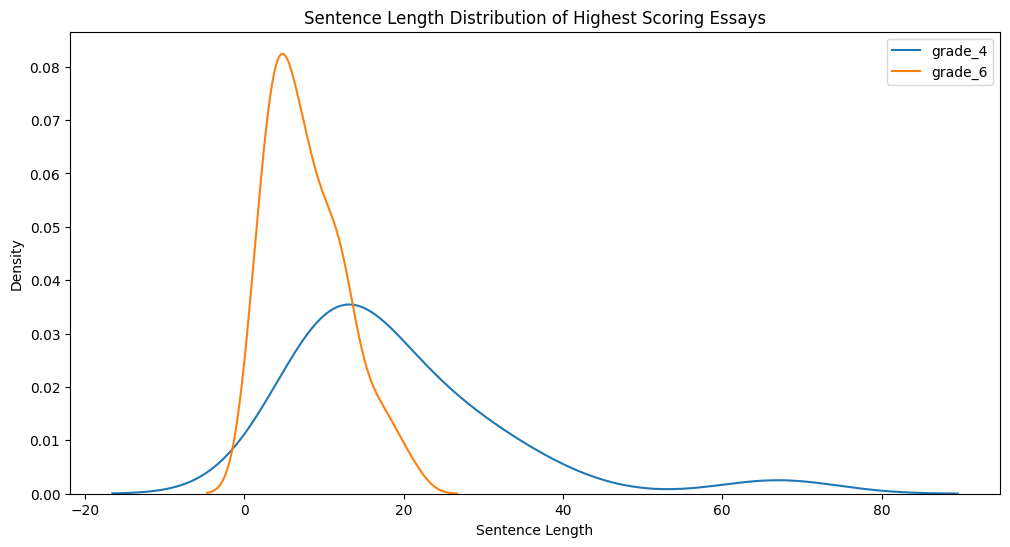

Summary of Highest Scoring Essays:

GRADE_4:
Score: 698
Vocabulary Size: 179
Average Sentence Length: 19.29
Median Sentence Length: 13.00
Standard Deviation of Sentence Length: 13.50

GRADE_6:
Score: 697
Vocabulary Size: 317
Average Sentence Length: 7.86
Median Sentence Length: 7.00
Standard Deviation of Sentence Length: 4.83


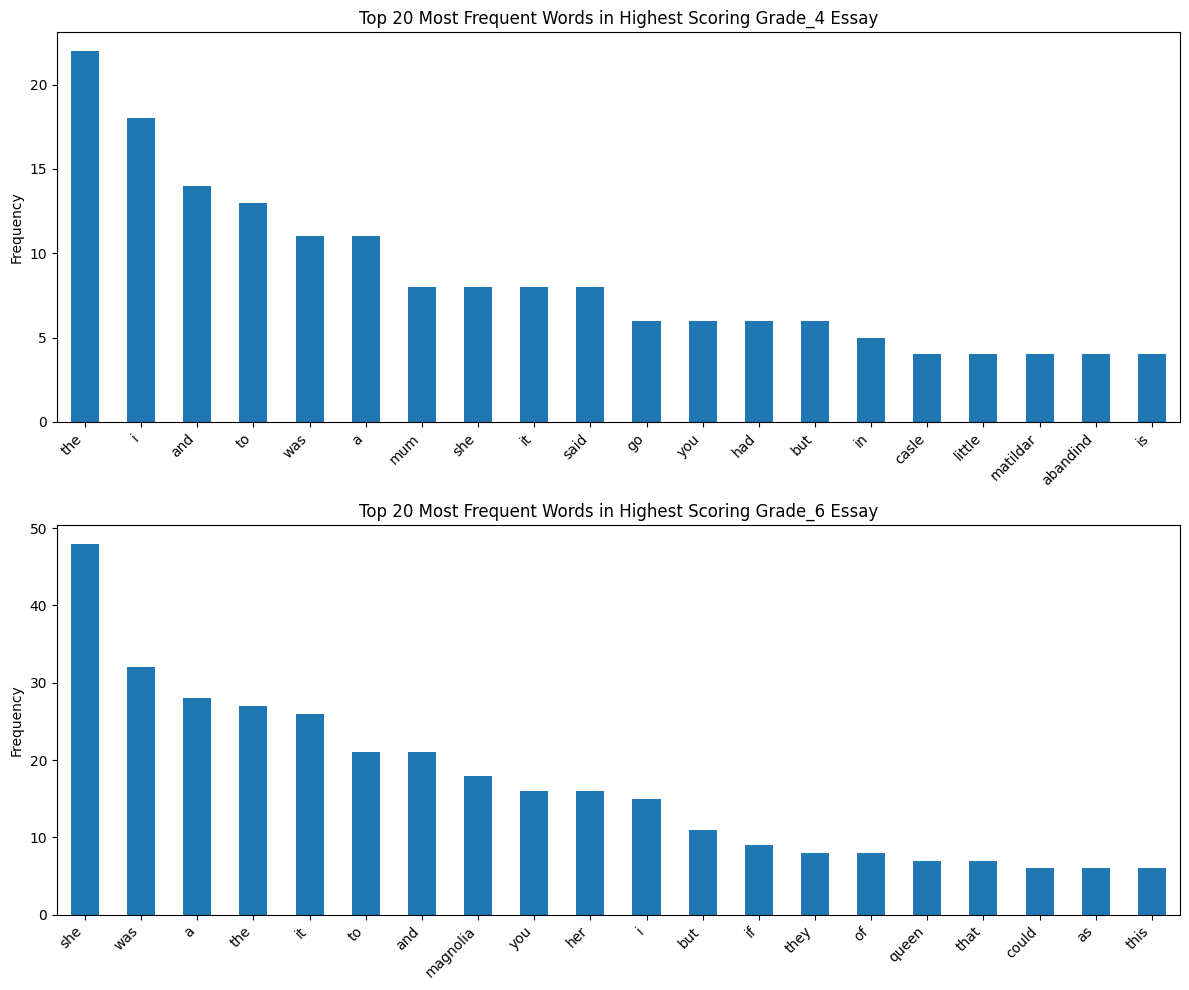


Unique Words Analysis:

GRADE_4 unique words (sample of 10):
half, full, stares, asleep, mam, old, years, confused, finech, far

GRADE_6 unique words (sample of 10):
hoping, maybe, cackled, did, basically, telling, trick, shook, thorn, staring

Common words between highest scoring essays (sample of 10):
if, what, black, that, into, next, where, was, when, come


In [2]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_vocabulary_size(text):
    words = preprocess_text(text)
    return len(set(words))

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
grade_levels = ['grade_4', 'grade_6']
highest_scores = {grade: 0 for grade in grade_levels}
highest_scoring_texts = {grade: '' for grade in grade_levels}

# Find highest scoring texts for each grade
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            if grade in grade_levels:
                score = int(filename.split('_')[-1].split('.')[0])
                if score > highest_scores[grade]:
                    highest_scores[grade] = score
                    with open(file_path, 'r', encoding='utf-8') as file:
                        highest_scoring_texts[grade] = file.read()

# Analyze highest scoring texts
results = {}
for grade, text in highest_scoring_texts.items():
    vocab_size = calculate_vocabulary_size(text)
    sentence_lengths = get_sentence_lengths(text)
    results[grade] = {
        'score': highest_scores[grade],
        'vocabulary_size': vocab_size,
        'sentence_lengths': sentence_lengths,
        'avg_sentence_length': np.mean(sentence_lengths),
        'median_sentence_length': np.median(sentence_lengths),
        'std_sentence_length': np.std(sentence_lengths)
    }

# Visualization
plt.figure(figsize=(12, 6))

# Vocabulary Size Comparison
plt.subplot(1, 2, 1)
vocab_sizes = [results[grade]['vocabulary_size'] for grade in grade_levels]
plt.bar(grade_levels, vocab_sizes)
plt.title('Vocabulary Size of Highest Scoring Essays')
plt.ylabel('Vocabulary Size')

# Average Sentence Length Comparison
plt.subplot(1, 2, 2)
avg_lengths = [results[grade]['avg_sentence_length'] for grade in grade_levels]
plt.bar(grade_levels, avg_lengths)
plt.title('Average Sentence Length of Highest Scoring Essays')
plt.ylabel('Average Sentence Length')

plt.tight_layout()
plt.show()

# Sentence Length Distribution
plt.figure(figsize=(12, 6))
for grade in grade_levels:
    sns.kdeplot(results[grade]['sentence_lengths'], label=grade)
plt.title('Sentence Length Distribution of Highest Scoring Essays')
plt.xlabel('Sentence Length')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print summary statistics
print("Summary of Highest Scoring Essays:")
for grade in grade_levels:
    print(f"\n{grade.upper()}:")
    print(f"Score: {results[grade]['score']}")
    print(f"Vocabulary Size: {results[grade]['vocabulary_size']}")
    print(f"Average Sentence Length: {results[grade]['avg_sentence_length']:.2f}")
    print(f"Median Sentence Length: {results[grade]['median_sentence_length']:.2f}")
    print(f"Standard Deviation of Sentence Length: {results[grade]['std_sentence_length']:.2f}")

# Word frequency analysis
def get_word_frequency(text):
    words = preprocess_text(text)
    return pd.Series(words).value_counts()

plt.figure(figsize=(12, 10))
for i, grade in enumerate(grade_levels):
    plt.subplot(2, 1, i+1)
    word_freq = get_word_frequency(highest_scoring_texts[grade])
    word_freq[:20].plot(kind='bar')
    plt.title(f'Top 20 Most Frequent Words in Highest Scoring {grade.capitalize()} Essay')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Unique words analysis
unique_words = {grade: set(preprocess_text(text)) for grade, text in highest_scoring_texts.items()}
common_words = set.intersection(*unique_words.values())
unique_to_grade = {grade: words - common_words for grade, words in unique_words.items()}

print("\nUnique Words Analysis:")
for grade in grade_levels:
    print(f"\n{grade.upper()} unique words (sample of 10):")
    print(', '.join(list(unique_to_grade[grade])[:10]))

print("\nCommon words between highest scoring essays (sample of 10):")
print(', '.join(list(common_words)[:10]))

# Text Analysis of Lowest Scoring Student Essays

This code is designed to analyze the lowest scoring student essays within a categorized dataset. It begins by defining functions to preprocess the text, calculate vocabulary size, and measure sentence lengths. The code then traverses through specified directories to identify and load the essays with the lowest scores for grades 4 and 6. After extracting these texts, the vocabulary sizes and sentence lengths are computed. The results are visualized through bar charts and line plots to display the vocabulary size and sentence length variations. Finally, the code prints out statistical summaries, including the mean, median, and standard deviation of the sentence lengths, to provide insights into the linguistic characteristics of the lowest scoring essays.


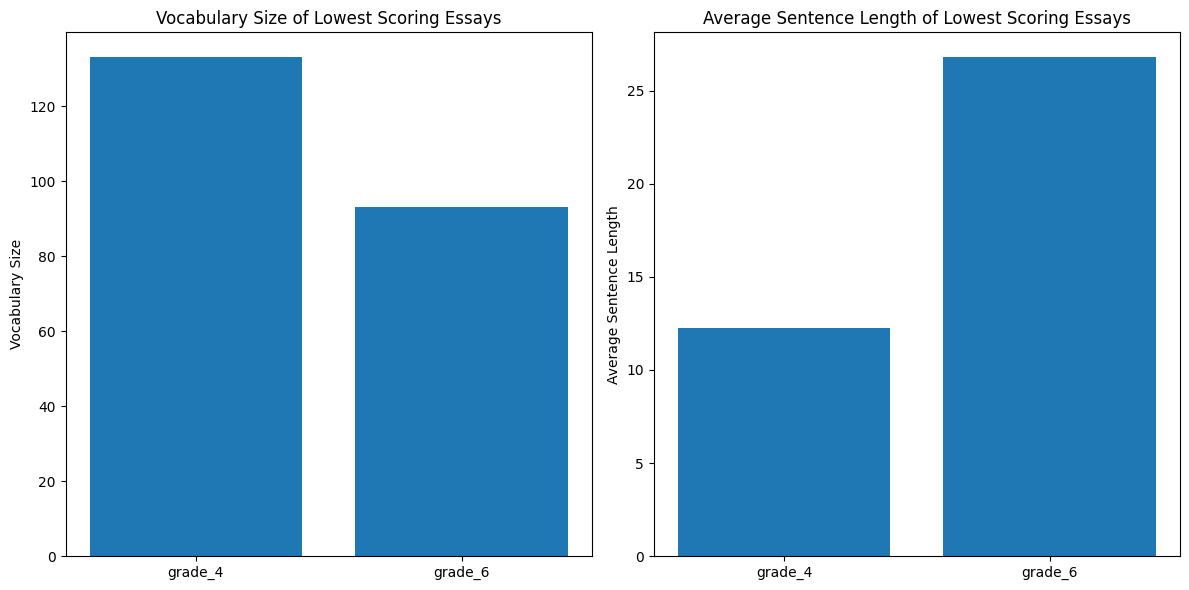

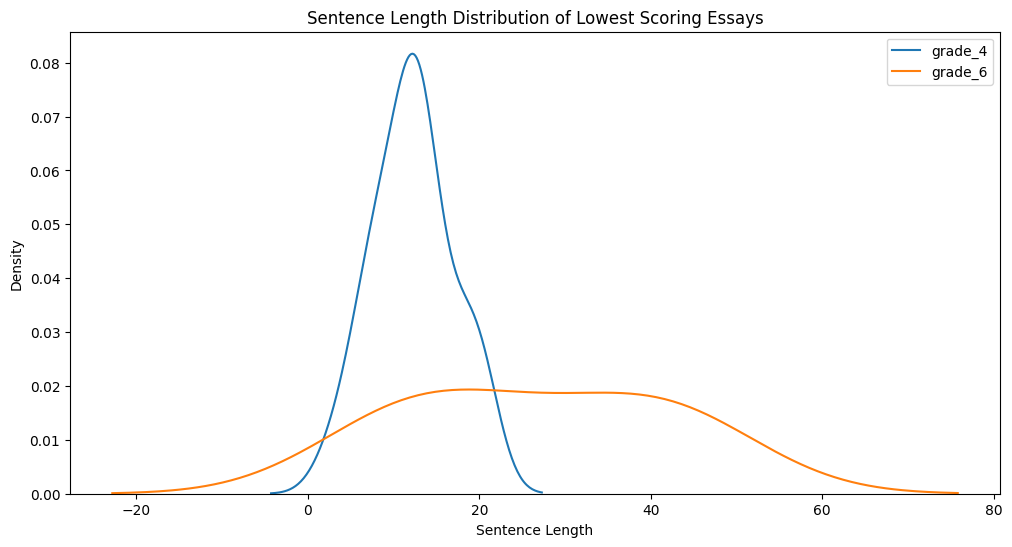

Summary of Lowest Scoring Essays:

GRADE_4:
Score: 316
Vocabulary Size: 133
Average Sentence Length: 12.25
Median Sentence Length: 12.50
Standard Deviation of Sentence Length: 4.49

GRADE_6:
Score: 353
Vocabulary Size: 93
Average Sentence Length: 26.80
Median Sentence Length: 26.00
Standard Deviation of Sentence Length: 13.50


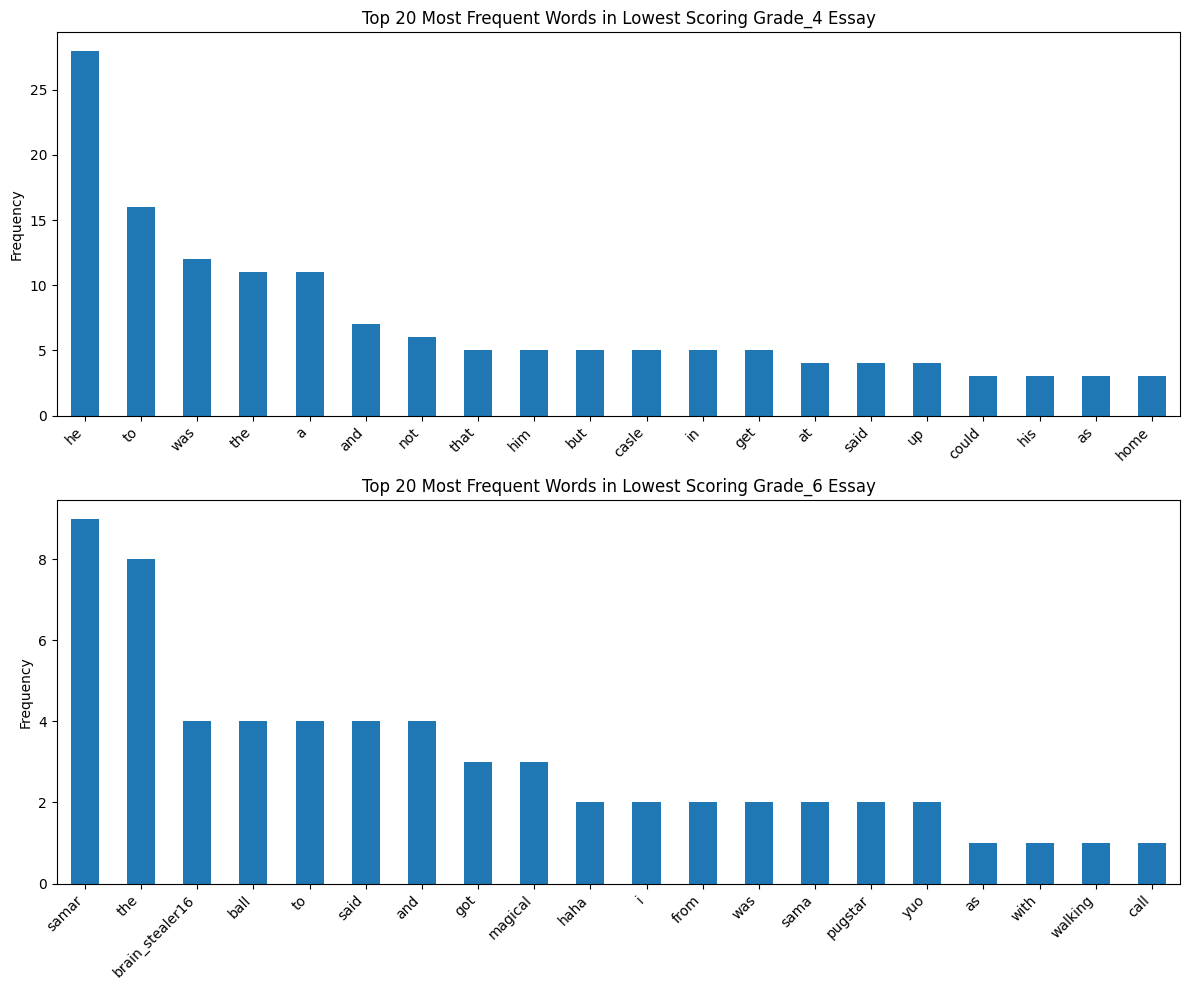


Unique Words Analysis:

GRADE_4 unique words (sample of 10):
teeth, thinking, top, did, fear, asleep, couple, chomped, new, finally

GRADE_6 unique words (sample of 10):
speak, villianly, trappers, war, okay, walking, delete, vs, into, will

Common words between lowest scoring essays (sample of 10):
one, get, then, where, was, be, up, you, got, said


In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_text(text):
    return re.findall(r'\w+', text.lower())

def calculate_vocabulary_size(text):
    words = preprocess_text(text)
    return len(set(words))

def get_sentence_lengths(text):
    sentences = re.split(r'[.!?]+', text)
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

base_dir = r'C:\Users\User\Desktop\NNM PROJECT\DATASET\categorizedDataset'
grade_levels = ['grade_4', 'grade_6']
lowest_scores = {grade: float('inf') for grade in grade_levels}
lowest_scoring_texts = {grade: '' for grade in grade_levels}

# Find lowest scoring texts for each grade
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            path_parts = file_path.split(os.sep)
            grade = path_parts[-2]
            if grade in grade_levels:
                score = int(filename.split('_')[-1].split('.')[0])
                if score < lowest_scores[grade]:
                    lowest_scores[grade] = score
                    with open(file_path, 'r', encoding='utf-8') as file:
                        lowest_scoring_texts[grade] = file.read()

# Analyze lowest scoring texts
results = {}
for grade, text in lowest_scoring_texts.items():
    vocab_size = calculate_vocabulary_size(text)
    sentence_lengths = get_sentence_lengths(text)
    results[grade] = {
        'score': lowest_scores[grade],
        'vocabulary_size': vocab_size,
        'sentence_lengths': sentence_lengths,
        'avg_sentence_length': np.mean(sentence_lengths),
        'median_sentence_length': np.median(sentence_lengths),
        'std_sentence_length': np.std(sentence_lengths)
    }

# Visualization
plt.figure(figsize=(12, 6))

# Vocabulary Size Comparison
plt.subplot(1, 2, 1)
vocab_sizes = [results[grade]['vocabulary_size'] for grade in grade_levels]
plt.bar(grade_levels, vocab_sizes)
plt.title('Vocabulary Size of Lowest Scoring Essays')
plt.ylabel('Vocabulary Size')

# Average Sentence Length Comparison
plt.subplot(1, 2, 2)
avg_lengths = [results[grade]['avg_sentence_length'] for grade in grade_levels]
plt.bar(grade_levels, avg_lengths)
plt.title('Average Sentence Length of Lowest Scoring Essays')
plt.ylabel('Average Sentence Length')

plt.tight_layout()
plt.show()

# Sentence Length Distribution
plt.figure(figsize=(12, 6))
for grade in grade_levels:
    sns.kdeplot(results[grade]['sentence_lengths'], label=grade)
plt.title('Sentence Length Distribution of Lowest Scoring Essays')
plt.xlabel('Sentence Length')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print summary statistics
print("Summary of Lowest Scoring Essays:")
for grade in grade_levels:
    print(f"\n{grade.upper()}:")
    print(f"Score: {results[grade]['score']}")
    print(f"Vocabulary Size: {results[grade]['vocabulary_size']}")
    print(f"Average Sentence Length: {results[grade]['avg_sentence_length']:.2f}")
    print(f"Median Sentence Length: {results[grade]['median_sentence_length']:.2f}")
    print(f"Standard Deviation of Sentence Length: {results[grade]['std_sentence_length']:.2f}")

# Word frequency analysis
def get_word_frequency(text):
    words = preprocess_text(text)
    return pd.Series(words).value_counts()

plt.figure(figsize=(12, 10))
for i, grade in enumerate(grade_levels):
    plt.subplot(2, 1, i+1)
    word_freq = get_word_frequency(lowest_scoring_texts[grade])
    word_freq[:20].plot(kind='bar')
    plt.title(f'Top 20 Most Frequent Words in Lowest Scoring {grade.capitalize()} Essay')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Unique words analysis
unique_words = {grade: set(preprocess_text(text)) for grade, text in lowest_scoring_texts.items()}
common_words = set.intersection(*unique_words.values())
unique_to_grade = {grade: words - common_words for grade, words in unique_words.items()}

print("\nUnique Words Analysis:")
for grade in grade_levels:
    print(f"\n{grade.upper()} unique words (sample of 10):")
    print(', '.join(list(unique_to_grade[grade])[:10]))

print("\nCommon words between lowest scoring essays (sample of 10):")
print(', '.join(list(common_words)[:10]))